In [1]:
#エージェントを定義する
#動ける方向を決める
class Agent:
    def __init__(self):
        self.actions = ["up","down","left","right"]
        self.position = (0,0)
        
agent = Agent()

In [2]:
#環境の定義を行う
#タイルワールドの縦横のマス目の数を指定　size+1のマス目になる
size = 4


class State:
    def __init__(self,actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "up"
        self.goal = False
        
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] =0.0
        self.goal = True

        
states = [[State(agent.actions) for i in range(size)] for j in range(size)]


#タイルワールド内のゴール位置を設定する
#現在の状態だとタイルワールドの右上の端になるようになっている
states[size-1][size-1].set_goal(agent.actions)


# 不可侵領域を設定
#座標を設定することで壁を設置
not_area = [[1,1],[1,2],[3,2]]

for x,y in not_area:
    states[x][y].best_action = "up"
    states[x][y].Q["up"] = 100.0
    states[x][y].Q["down"] = 100.0
    states[x][y].Q["right"] = 100.0
    states[x][y].Q["left"] = 100.0

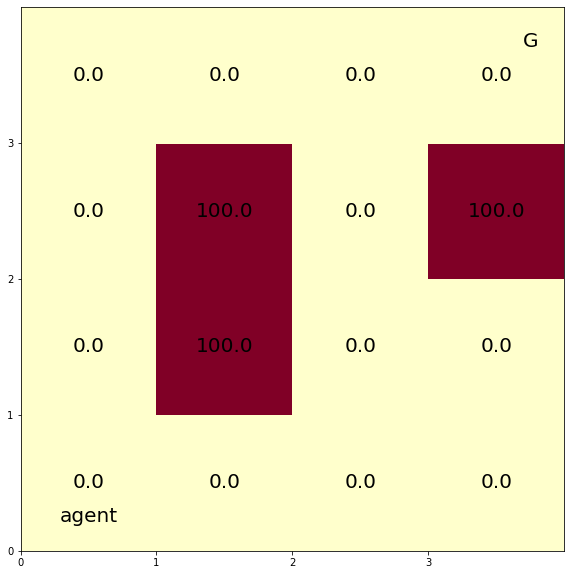

In [4]:
#描画
import matplotlib.pyplot as plt  
import matplotlib.patches as patches


#タイルワールドを大きくするためのもの
from pylab import rcParams
rcParams['figure.figsize'] = 10,10


def draw(mark_position):
    fig, ax = plt.subplots()
    values = [[states[i][j].Q[states[i][j].best_action] for i in range(size)] for j in range(size)]
    mp = ax.pcolor(values, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[x][y]
            plt.text(x+0.5,y+0.5,int(1000*s.Q[s.best_action])/1000,ha = 'center', va = 'center', size=20)
            if states[x][y].goal:
                plt.text(x+0.75,y+0.75,"G",ha = 'center', va = 'center', size=20)
                
    plt.text(agent.position[0]+0.5,agent.position[1]+0.25,"agent",ha = 'center', va = 'center', size=20)
    
    if mark_position == "all":   # 指定した位置にactionの文字列を書くという処理
        for x in range(size):
            for y in range(size):
                if states[x][y].goal: continue
                plt.text(x+0.5,y+0.25,states[x][y].best_action,ha = 'center', va = 'center', size=20)
    elif mark_position != None: 
        s = states[mark_position[0]][mark_position[1]]
        plt.text(mark_position[0]+0.5,mark_position[1]+0.25,s.best_action,ha = 'center', va = 'center', size=20)
            
    plt.show()
    fig.clear()
    
draw(None)

In [5]:
#状態遷移の実装
import random

def state_transition(s_position,a):
    ###確率10%で元のまま ###
    if random.uniform(0,1) < 0.1:
        return s_position
    
    x,y = s_position
    if   a == "up": y += 1
    elif a == "down": y -= 1
    elif a == "right": x += 1
    elif a == "left": x -= 1
        
    if x < 0:       x = 0
    elif x >= size: x = size-1
    if y < 0:       y = 0
    elif y >= size: y = size-1
        
    return (x,y)

In [6]:
#方策

def e_greedy(s, x, y):
    if random.uniform(0,1) < 0.1: #ランダムになる割合
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        
        for a in s.Q:
            # 探索不可領域の判定
            next_x = x
            next_y = y
            if   a == "up": next_y += 1
            elif a == "down": next_y -= 1
            elif a == "right": next_x += 1
            elif a == "left": next_x -= 1
            
            ok_flag = True
            
            for not_x, not_y in not_area:
                if next_x is not_x and next_y is not_y:
                    ok_flag = False
            
            if ok_flag is True:
                print("x:"+str(next_x))
                print("y:"+str(next_y))
                if best_q > s.Q[a]:
                    best_q = s.Q[a]
                    best_a = a
        
        s.best_action = best_a
        return best_a

x:2
y:3
x:2
y:1
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


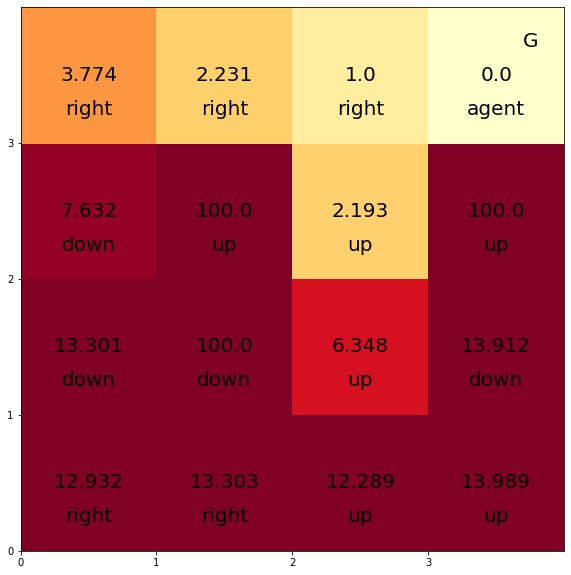

x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:right s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
s:(2, 2)　a:up s':(2, 3) a':left
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(2, 3)　a:left s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


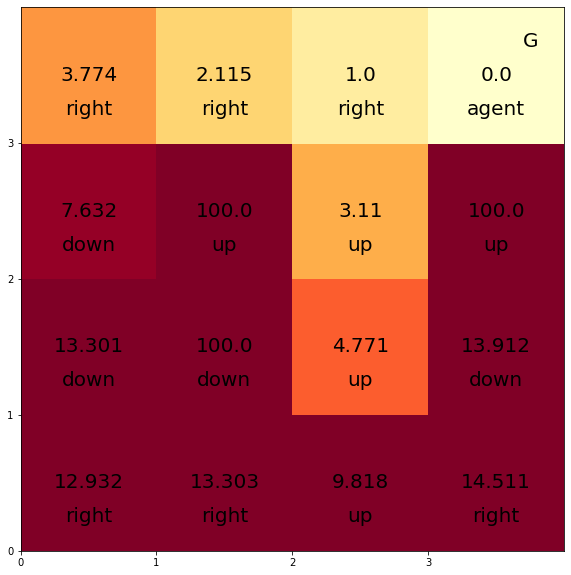

s:(2, 3)　a:up s':(2, 3) a':down
----
x:2
y:3
x:2
y:1
s:(2, 3)　a:down s':(2, 2) a':up
----
x:2
y:3
x:2
y:1
s:(2, 2)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


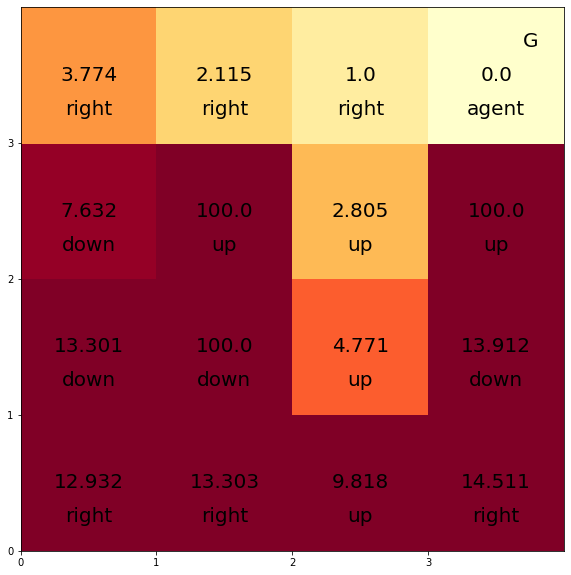

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':left
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(2, 3)　a:left s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


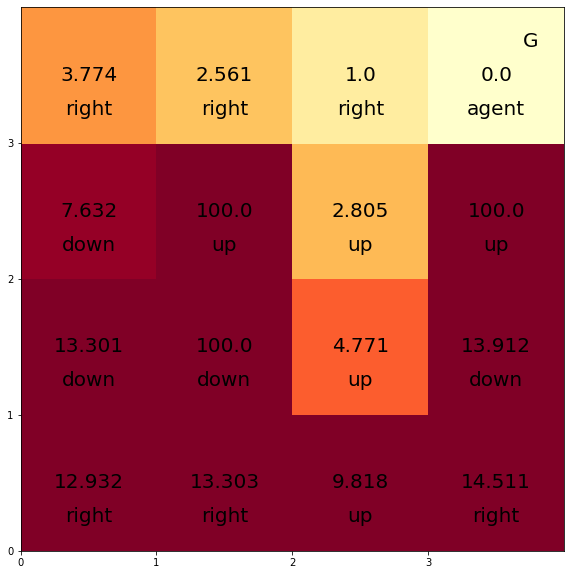

x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


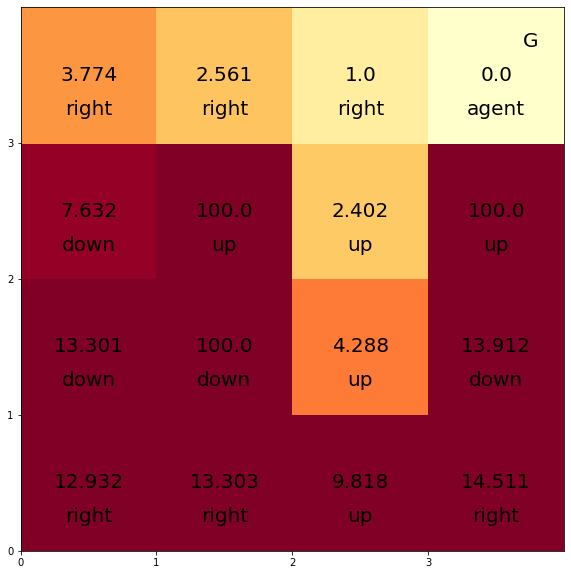

x:3
y:3
x:3
y:1
x:2
y:2
x:4
y:2
x:3
y:4
x:2
y:3
x:4
y:3
s:(3, 2)　a:up s':(3, 3) a':up
----


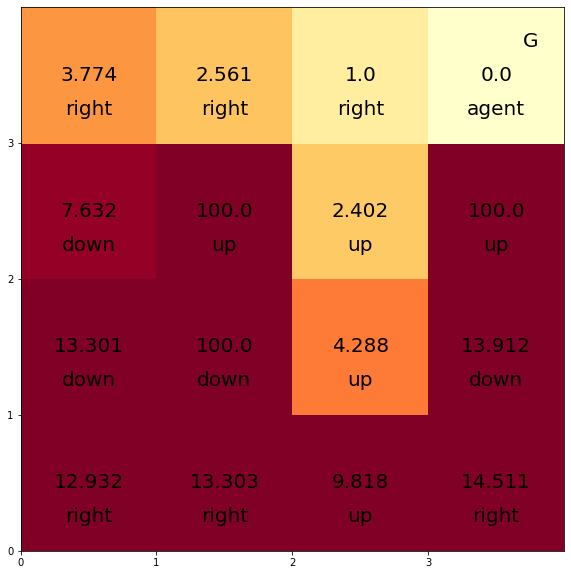

x:0
y:3
x:0
y:1
x:-1
y:2
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 2)　a:up s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


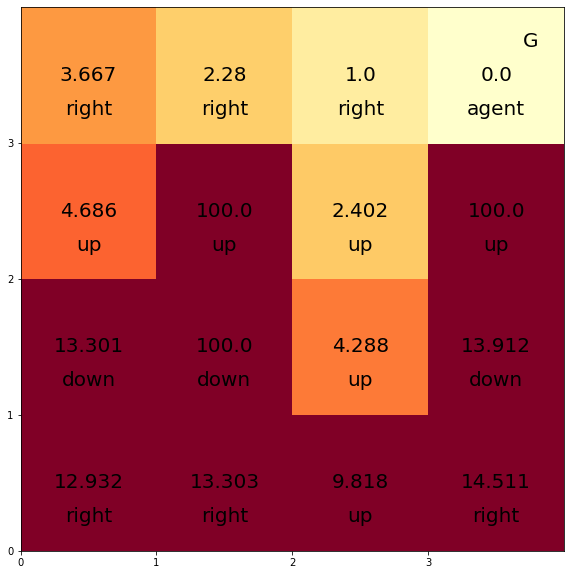

x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


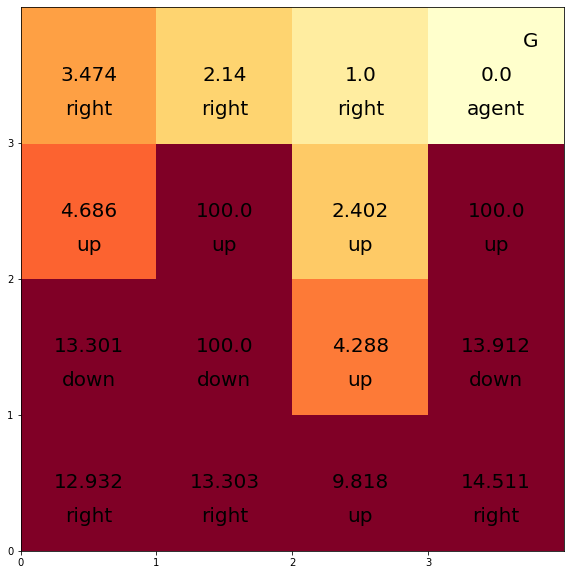

x:1
y:-1
x:0
y:0
x:2
y:0
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 0)　a:down s':(1, 0) a':down
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 0)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
x:1
y:0
x:0
y:1
x:2
y:1
s:(2, 1)　a:left s':(1, 1) a':down
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 1)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':down
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(2, 0)　a:down s':(2, 0) a':down
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(2, 0)　a:down s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':right
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 1)　a:right s':(3, 1) a':right
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 1)　a:right s':(3, 1) a':down
----
x:3
y:1
x:3
y:-1


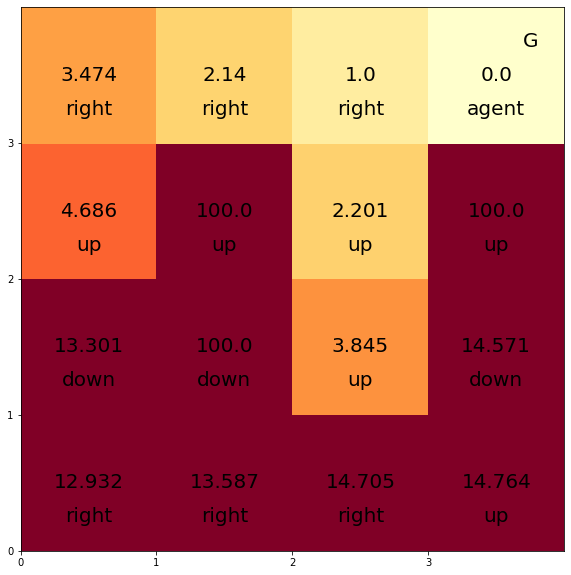

x:2
y:3
x:2
y:1
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


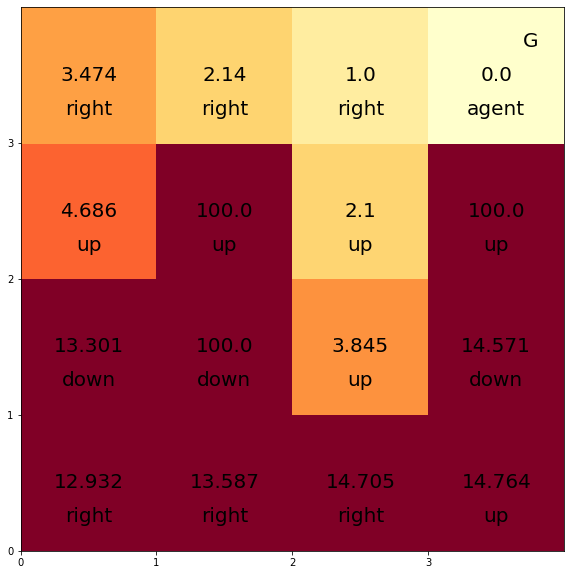

x:0
y:3
x:0
y:1
x:-1
y:2
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 2)　a:up s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


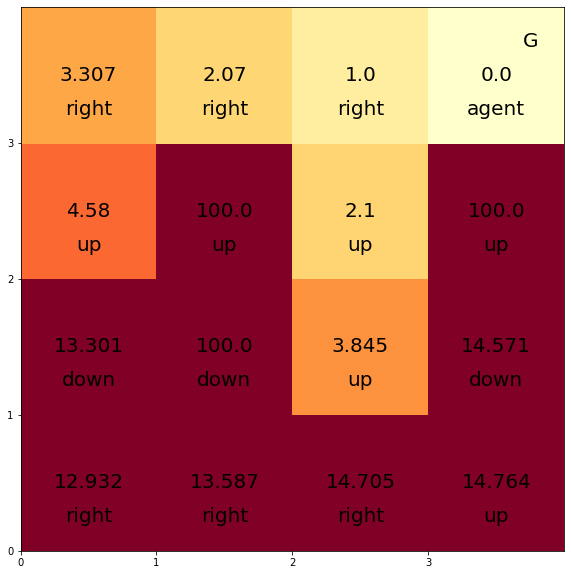

x:2
y:3
x:2
y:1
s:(2, 2)　a:right s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


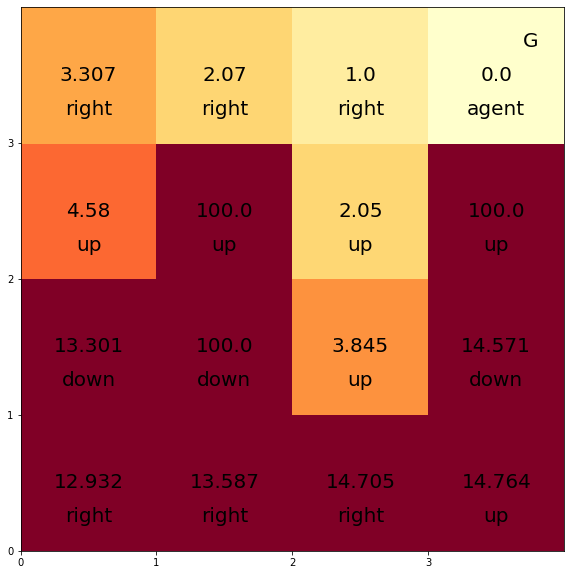

x:1
y:3
x:0
y:2
x:2
y:2
s:(0, 2)　a:right s':(1, 2) a':up
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


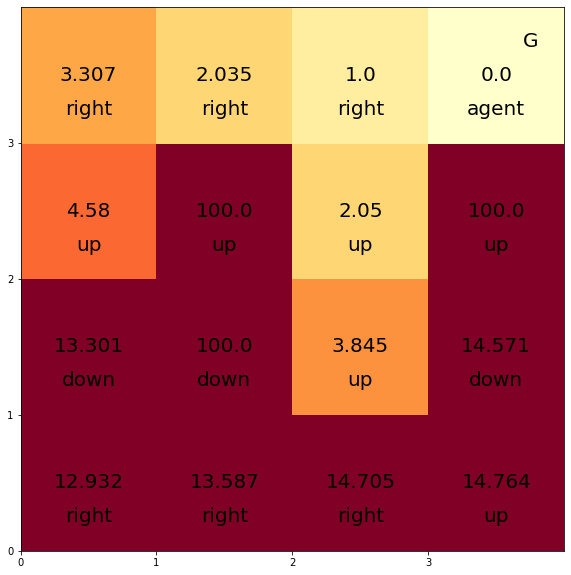

x:2
y:2
x:2
y:0
x:3
y:1
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


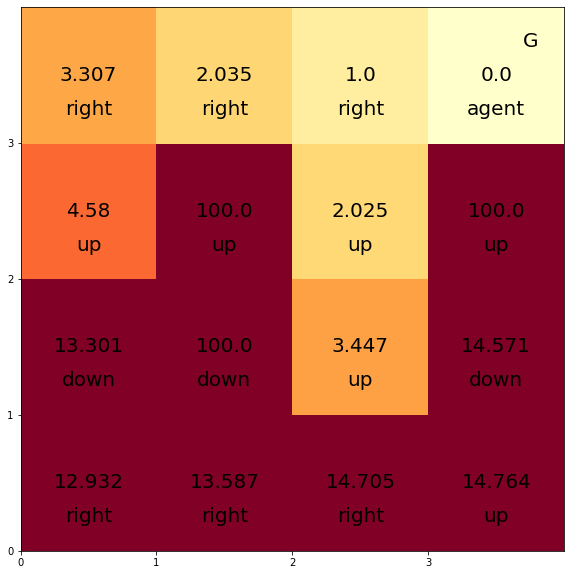

x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 2)　a:down s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':right
----


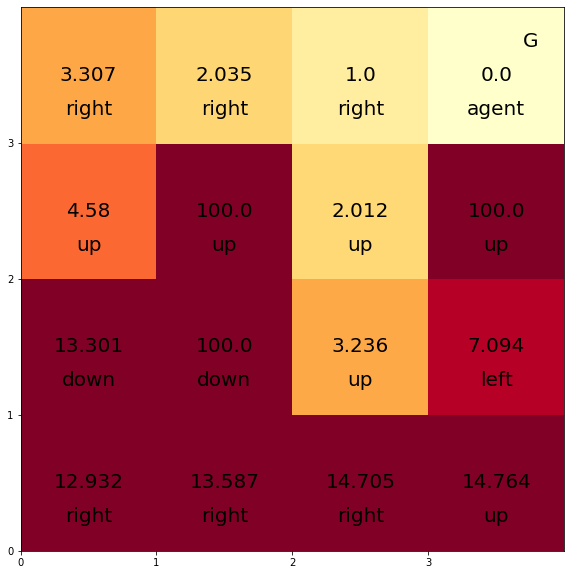

x:0
y:3
x:0
y:1
x:-1
y:2
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 2)　a:up s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


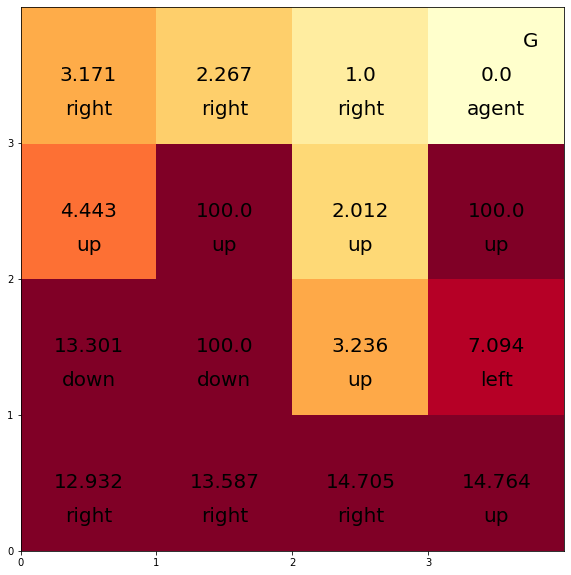

x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 3)　a:right s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':down
----
x:1
y:3
x:0
y:2
x:2
y:2
s:(1, 3)　a:down s':(1, 2) a':up
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


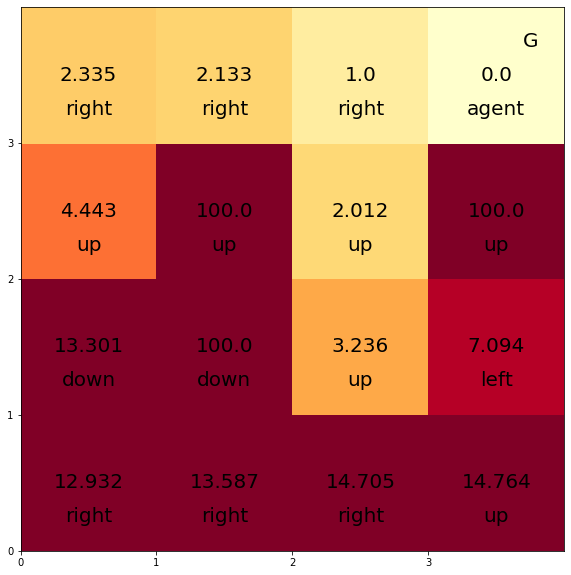

x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':left
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(1, 0)　a:left s':(0, 0) a':left
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:left s':(0, 0) a':left
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:left s':(0, 0) a':right
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 1)　a:left s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:2
y:4
x:2
y:2
x:

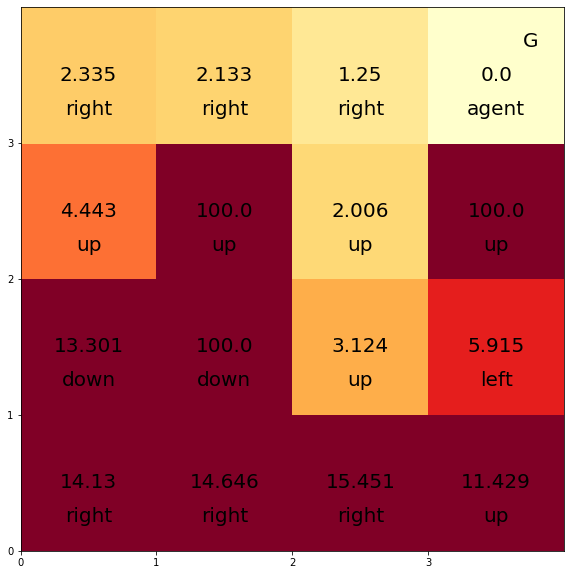

x:2
y:2
x:2
y:0
x:3
y:1
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


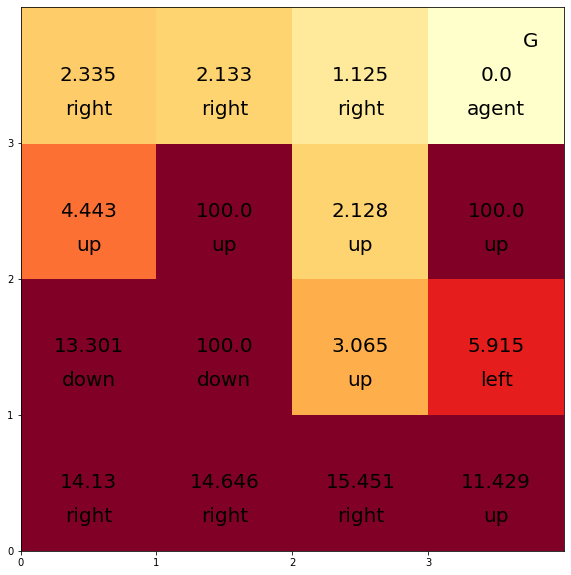

x:0
y:2
x:0
y:0
x:-1
y:1
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 1)　a:down s':(0, 0) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:down s':(0, 0) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:down s':(0, 0) a':up
----
x:0
y:2
x:0
y:0
x:-1
y:1
s:(0, 0)　a:up s':(0, 1) a':down
----
x:0
y:2
x:0
y:0
x:-1
y:1
s:(0, 1)　a:down s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':left
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:left s':(0, 0) a':right
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':left
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(1, 0)　a:left s':(0, 0) a':up
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:up s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 1)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':down
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 0)　a:down s':(1, 0) a':down
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 0)　a:down s':(1, 0) a':down
-

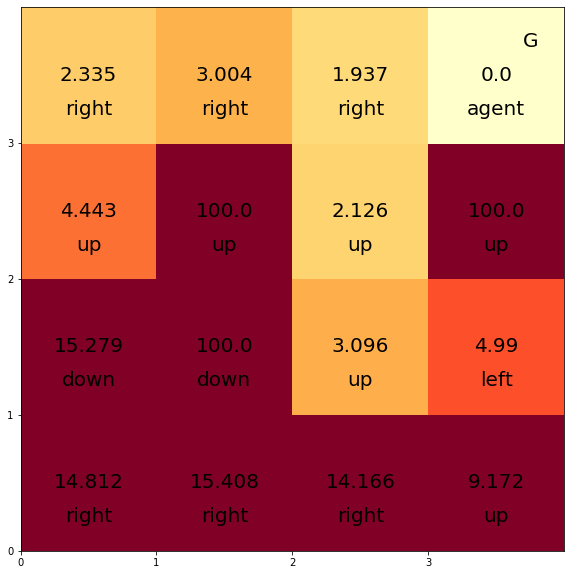

x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(2, 0)　a:right s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':right
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(2, 1)　a:right s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


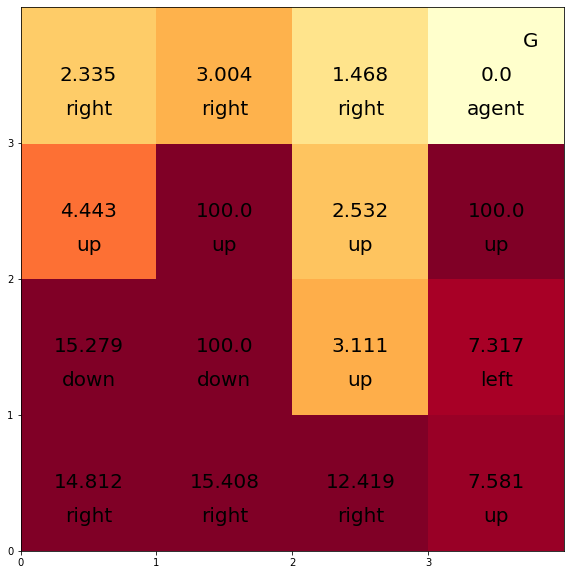

x:2
y:3
x:2
y:1
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


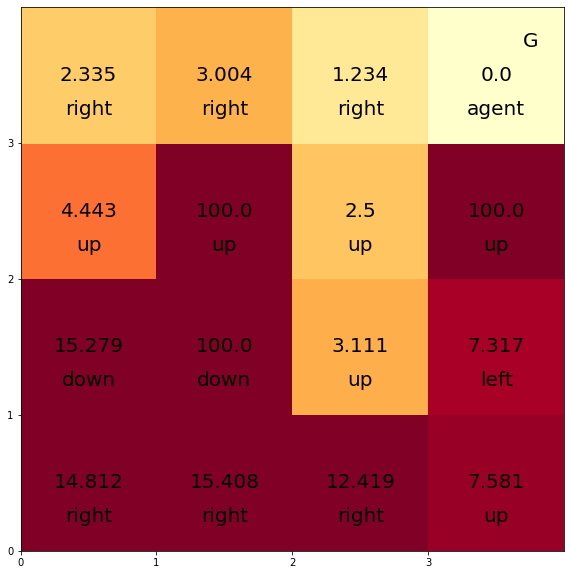

x:1
y:-1
x:0
y:0
x:2
y:0
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(1, 0)　a:left s':(0, 0) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:down s':(0, 0) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:down s':(0, 0) a':right
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':left
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(1, 0)　a:left s':(0, 0) a':left
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':right
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':down
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 0)　a:down s':(1, 0) a':down
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 0)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':down
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 1)　a:down s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
--

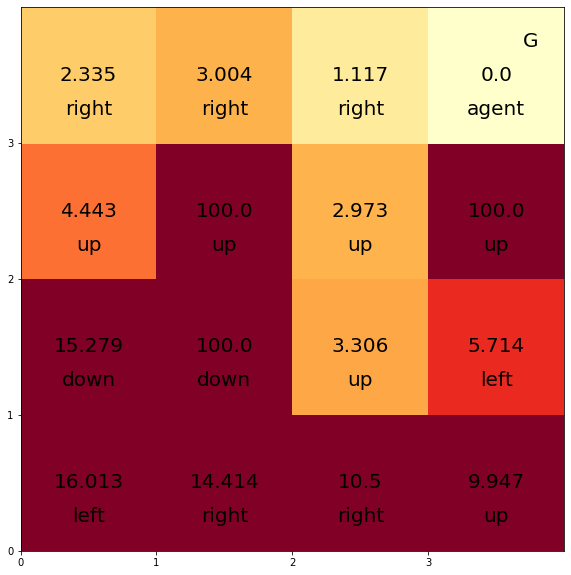

x:3
y:4
x:2
y:3
x:4
y:3


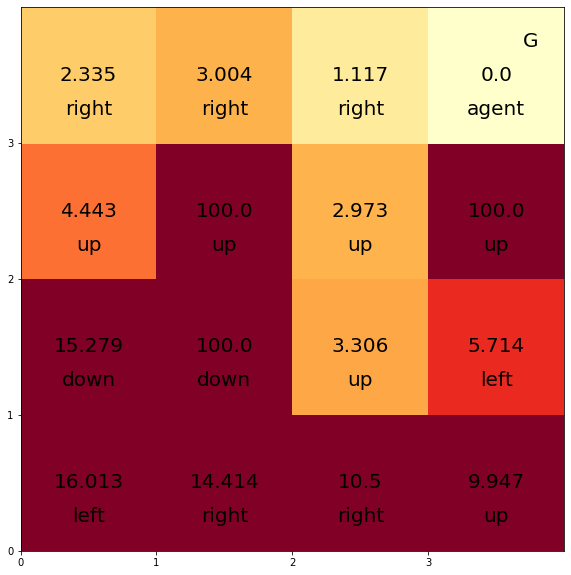

x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


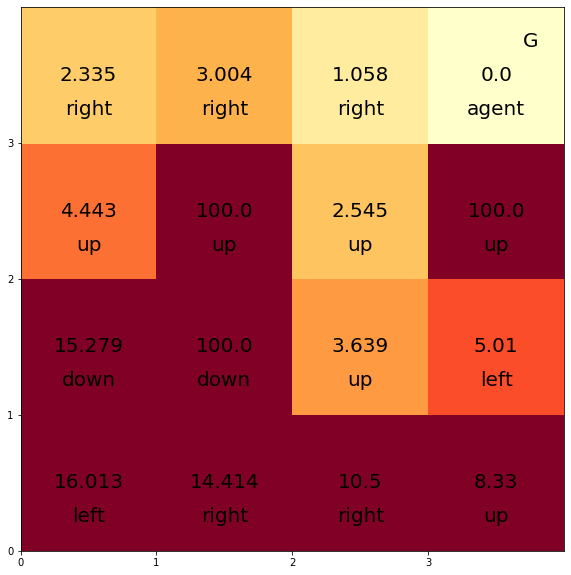

x:2
y:3
x:2
y:1
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


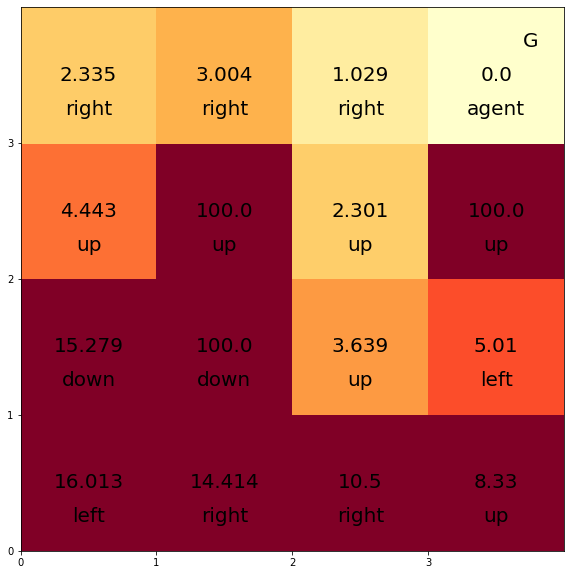

x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


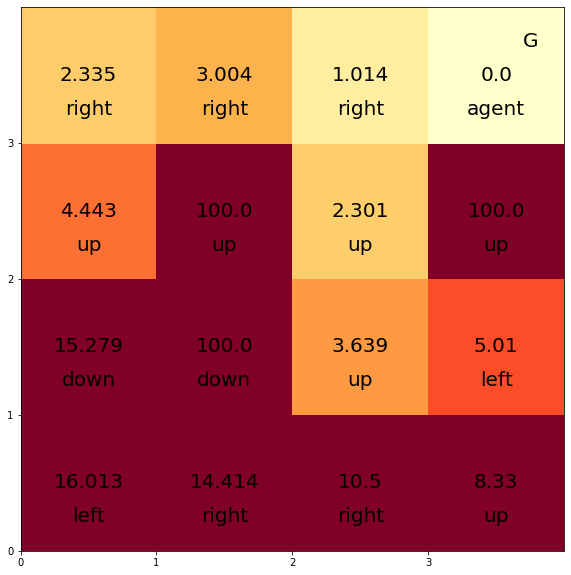

x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


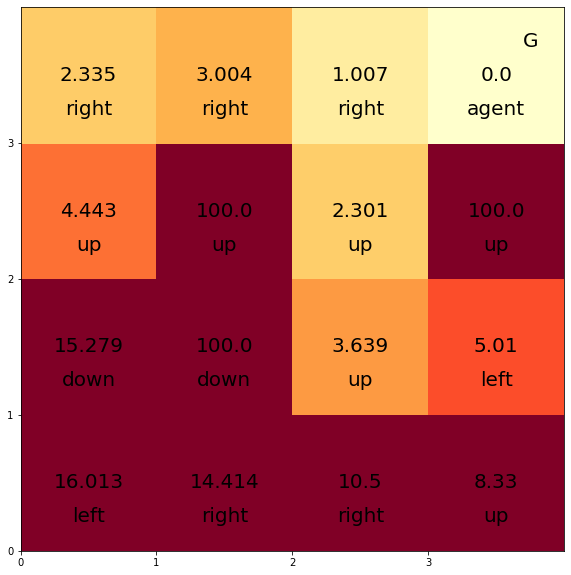

x:3
y:3
x:3
y:1
x:2
y:2
x:4
y:2
s:(3, 2)　a:left s':(3, 2) a':up
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(3, 2)　a:up s':(3, 3) a':up
----


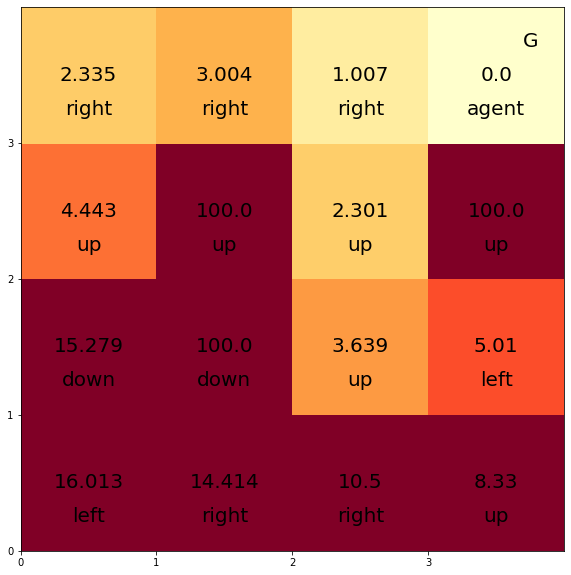

x:3
y:4
x:2
y:3
x:4
y:3


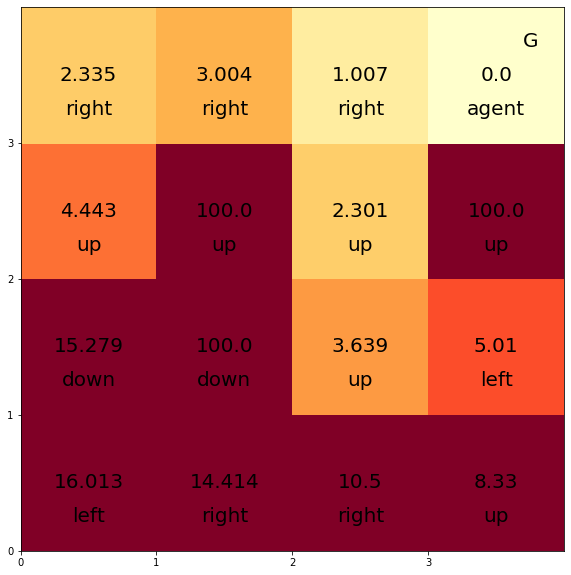

x:1
y:0
x:0
y:1
x:2
y:1
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 1)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 1)　a:left s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


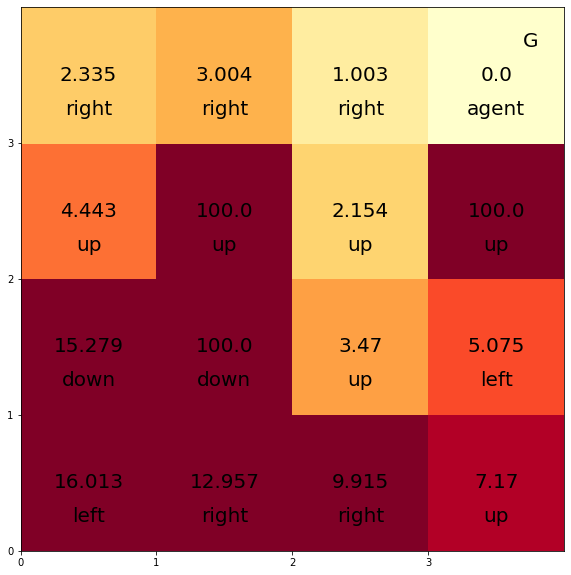

x:1
y:-1
x:0
y:0
x:2
y:0
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 1)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


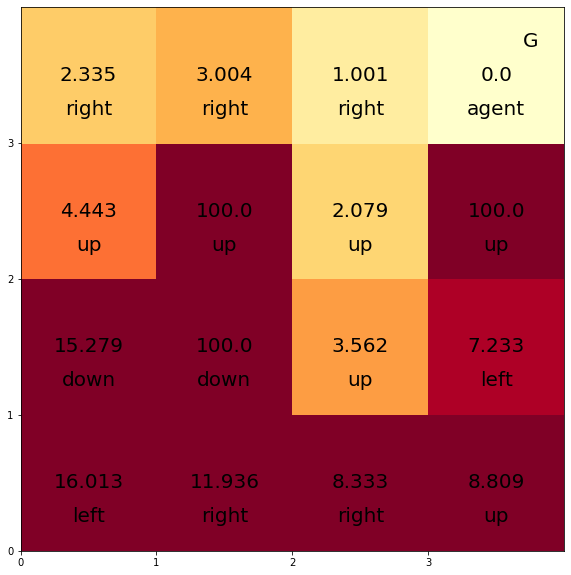

x:0
y:2
x:0
y:0
x:-1
y:1
x:0
y:2
x:0
y:0
x:-1
y:1
s:(0, 1)　a:left s':(0, 1) a':left
----
x:0
y:2
x:0
y:0
x:-1
y:1
s:(0, 1)　a:left s':(0, 1) a':left
----
x:0
y:2
x:0
y:0
x:-1
y:1
s:(0, 1)　a:left s':(0, 1) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 1)　a:down s':(0, 0) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:down s':(0, 0) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:down s':(0, 0) a':up
----
x:0
y:2
x:0
y:0
x:-1
y:1
s:(0, 0)　a:up s':(0, 1) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 1)　a:down s':(0, 0) a':right
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':right
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 0)　a:right s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:up s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1


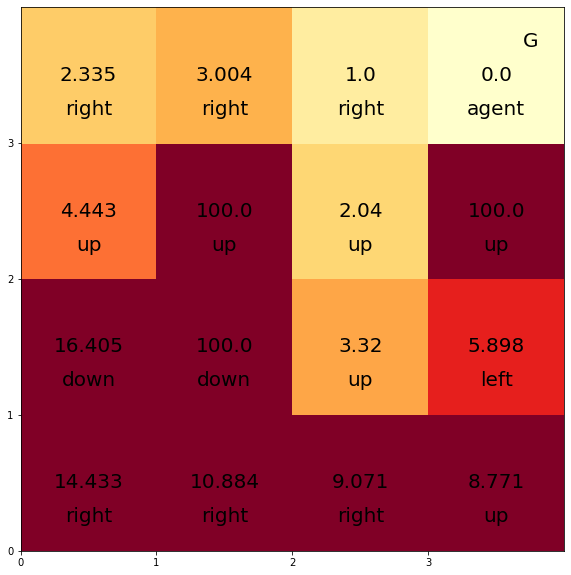

x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


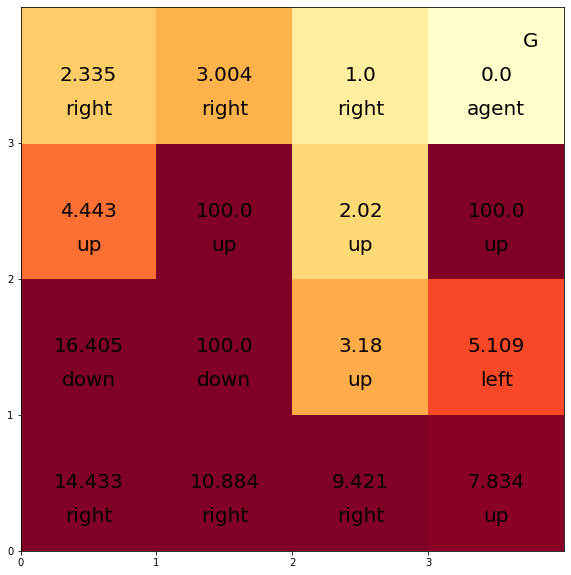

x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 3)　a:right s':(3, 3) a':left
----


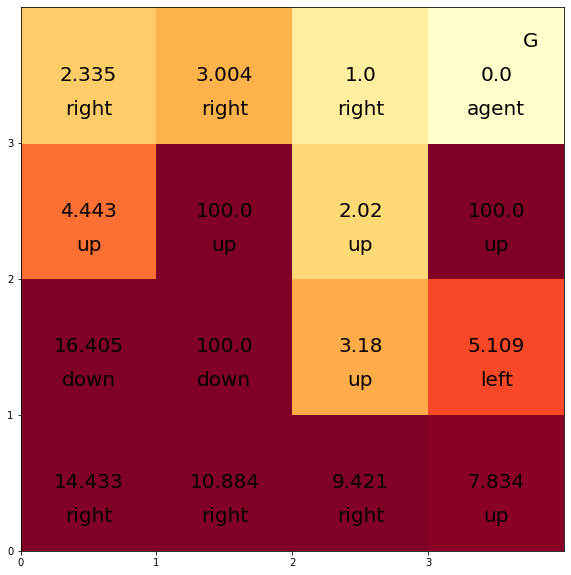

x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


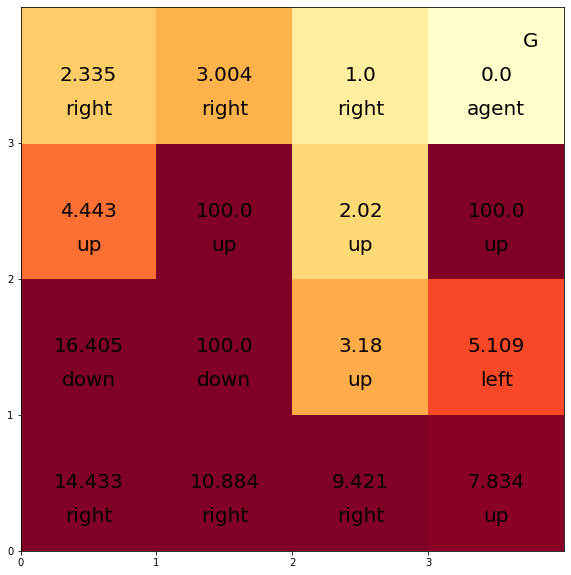

x:1
y:3
x:0
y:2
x:2
y:2
s:(1, 2)　a:up s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':down
----
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 3)　a:down s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


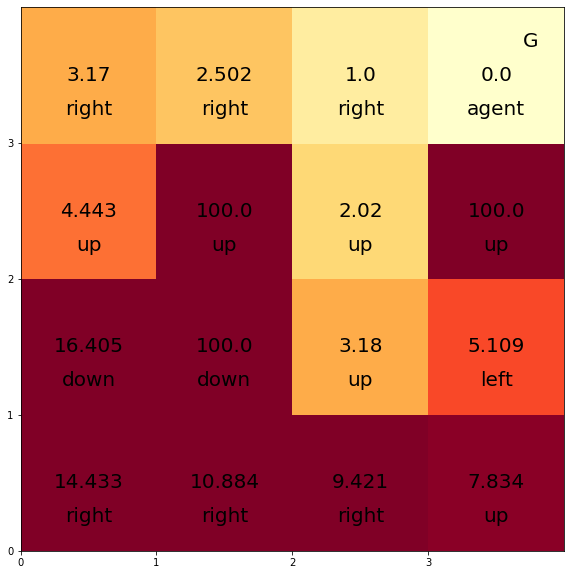

x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':left
----


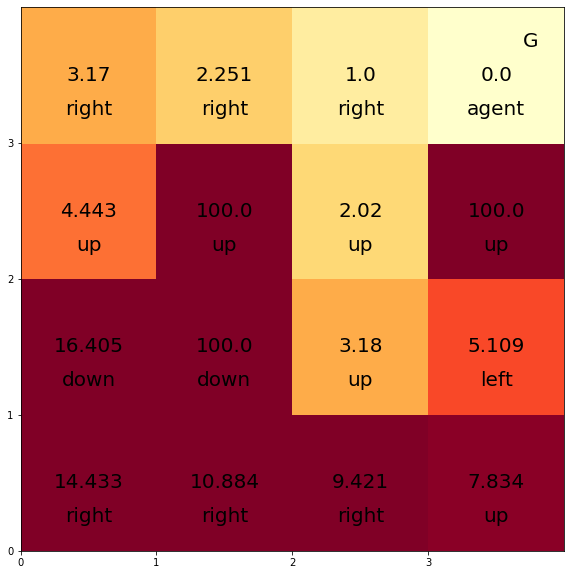

x:3
y:0
x:2
y:1
x:4
y:1
s:(2, 1)　a:right s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


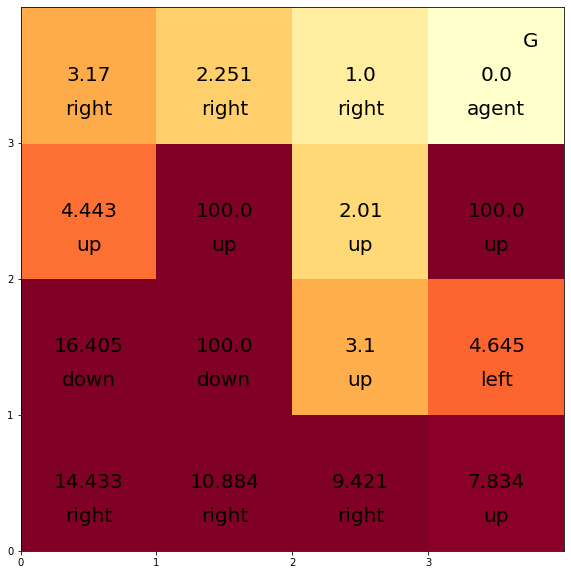

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:3
x:0
y:2
x:2
y:2
s:(1, 2)　a:up s':(1, 2) a':up
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


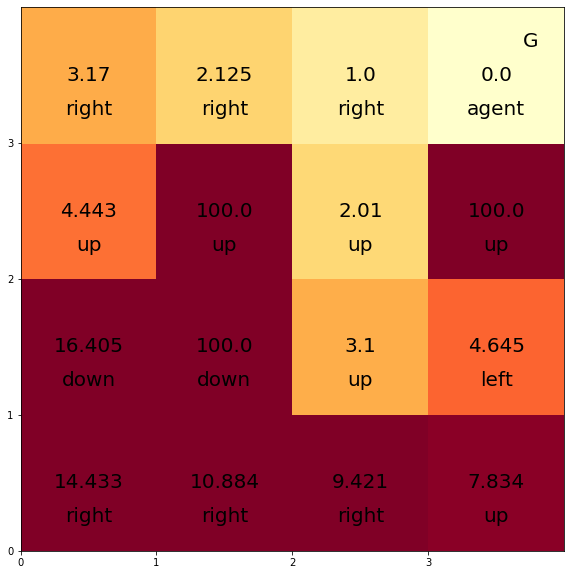

x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


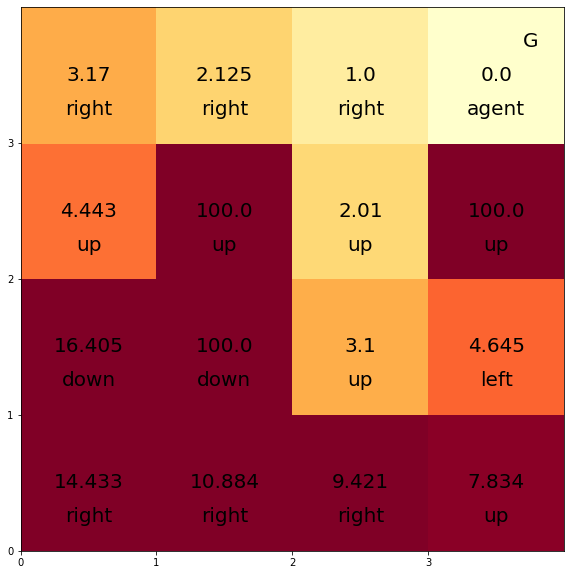

x:3
y:0
x:2
y:1
x:4
y:1
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':right
----
x:3
y:3
x:3
y:1
x:2
y:2
x:4
y:2
s:(2, 2)　a:right s':(3, 2) a':up
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(3, 2)　a:up s':(3, 3) a':up
----


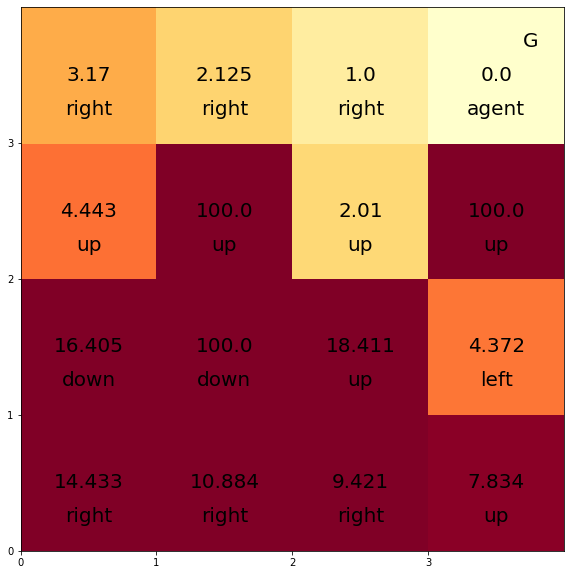

x:3
y:3
x:3
y:1
x:2
y:2
x:4
y:2
s:(3, 2)　a:right s':(3, 2) a':up
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(3, 2)　a:up s':(3, 3) a':up
----


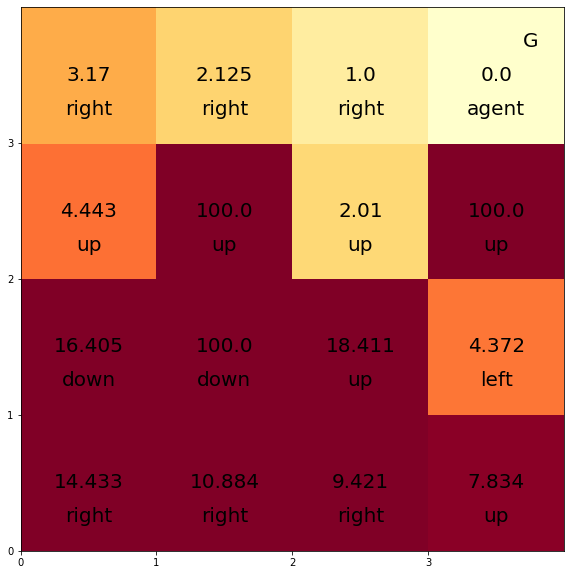

x:2
y:3
x:2
y:1
s:(2, 3)　a:down s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


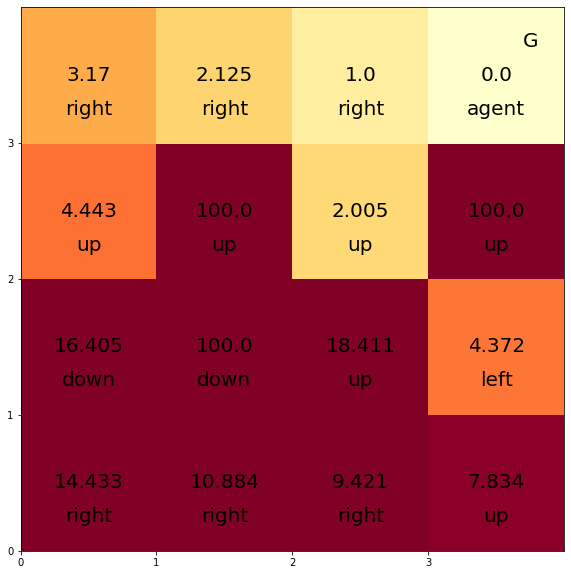

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


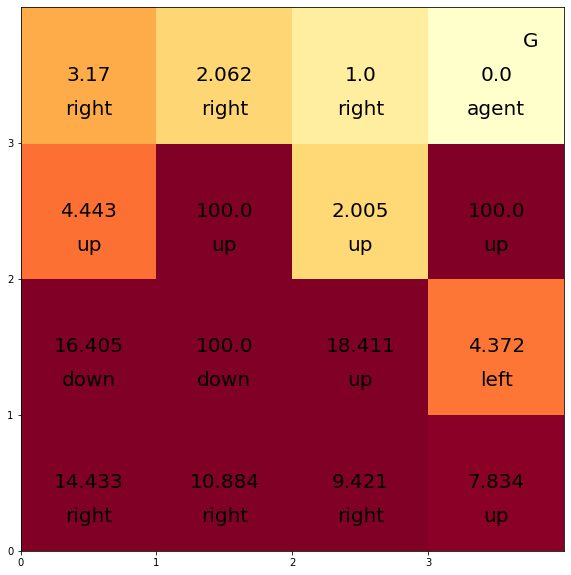

x:1
y:-1
x:0
y:0
x:2
y:0
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:up s':(3, 0) a':up
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':right
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(2, 1)　a:right s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':right
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(2, 1)　a:right s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':right
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(2, 1)　a:right s':(3, 1) a':left
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 1)　a:left s':(3, 1) a':left
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(3, 1)　a:left s':(2, 1) a':right
----
x:3
y:0
x:2
y:1
x:4
y:1
s:(2, 1)　a:right s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 

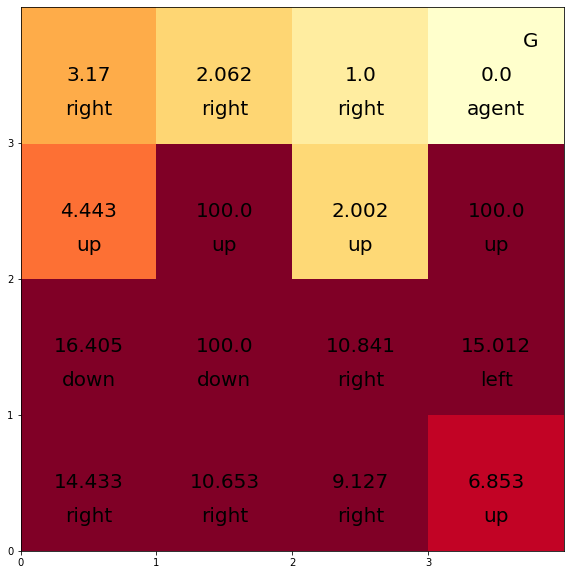

x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':up
----
x:3
y:3
x:3
y:1
x:2
y:2
x:4
y:2
s:(3, 1)　a:up s':(3, 2) a':up
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(3, 2)　a:up s':(3, 3) a':up
----


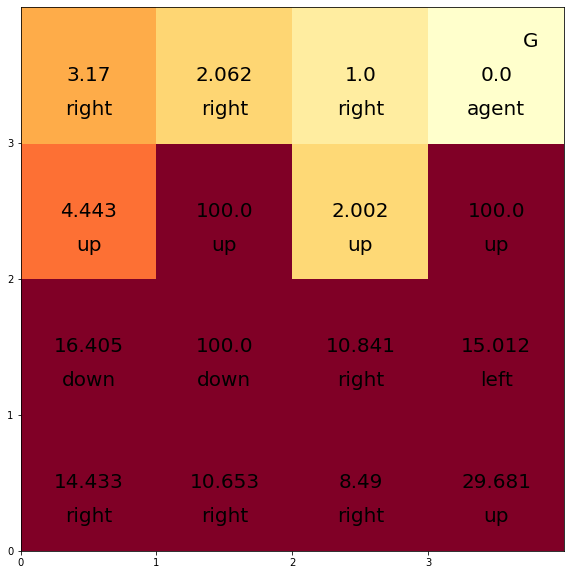

x:1
y:-1
x:0
y:0
x:2
y:0
s:(2, 0)　a:left s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':down
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:down s':(3, 0) a':down
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:down s':(3, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:right s':(3, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:right s':(3, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:right s':(3, 0) a':down
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:down s':(3, 0) a':down
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:down s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(2, 0)　a:right s':(2, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(2, 0)　a:right s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0)

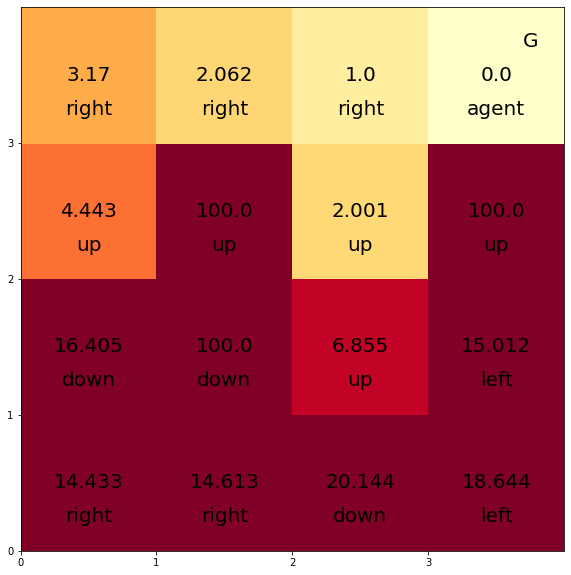

x:1
y:3
x:0
y:2
x:2
y:2
s:(1, 2)　a:up s':(1, 2) a':right
----
x:1
y:3
x:0
y:2
x:2
y:2
s:(1, 2)　a:right s':(1, 2) a':up
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


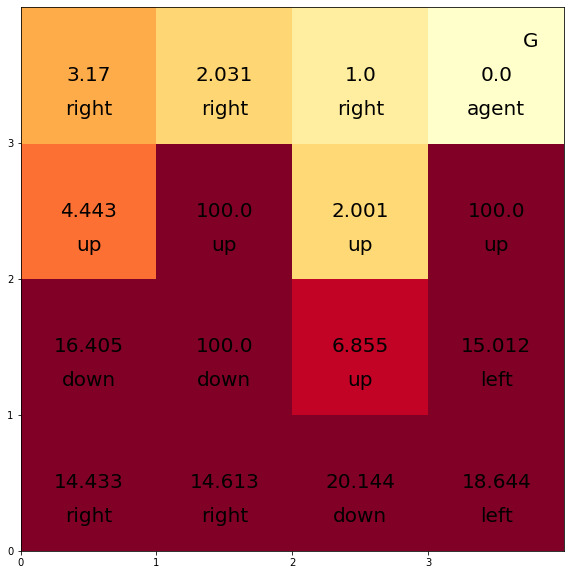

x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


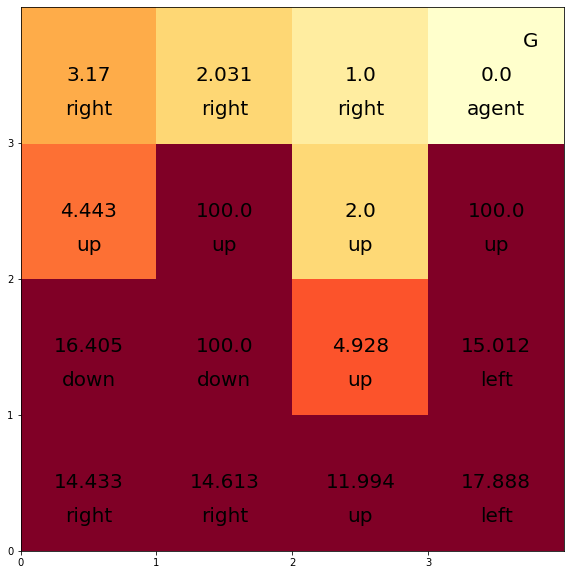

x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:left s':(3, 0) a':left
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:left s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


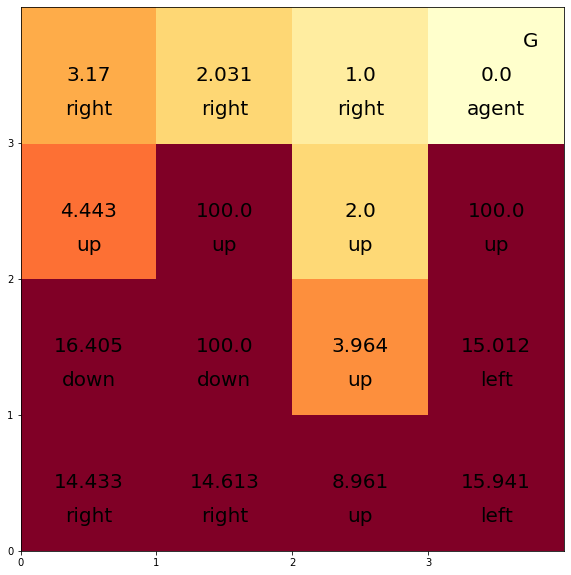

x:2
y:3
x:2
y:1
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


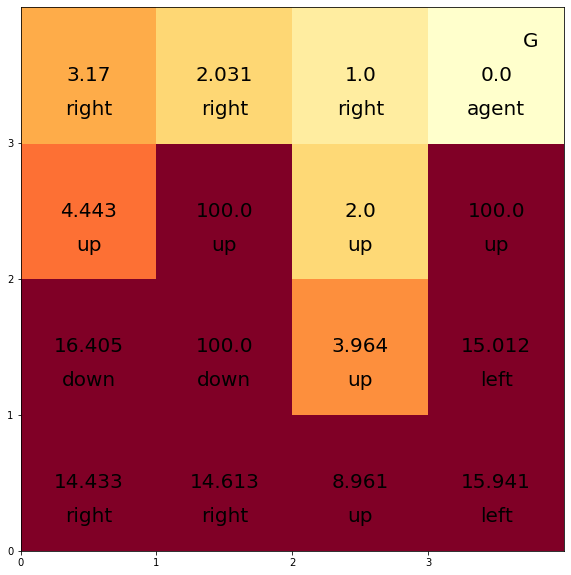

x:1
y:4
x:0
y:3
x:2
y:3
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


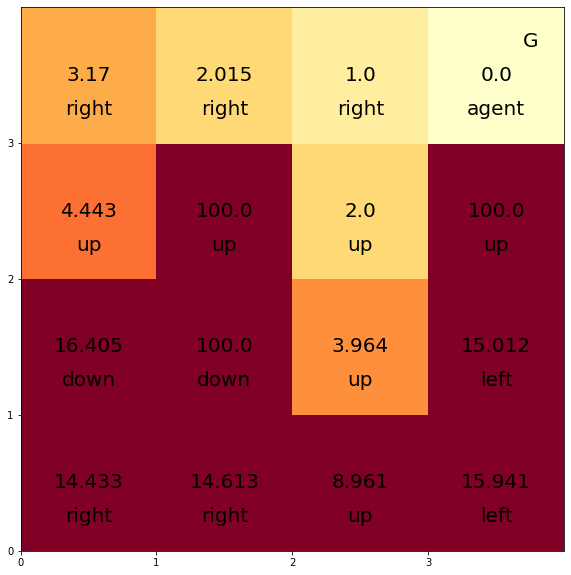

x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 1)　a:up s':(2, 1) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 1)　a:up s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':left
----
x:1
y:3
x:0
y:2
x:2
y:2
s:(2, 2)　a:left s':(1, 2) a':up
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


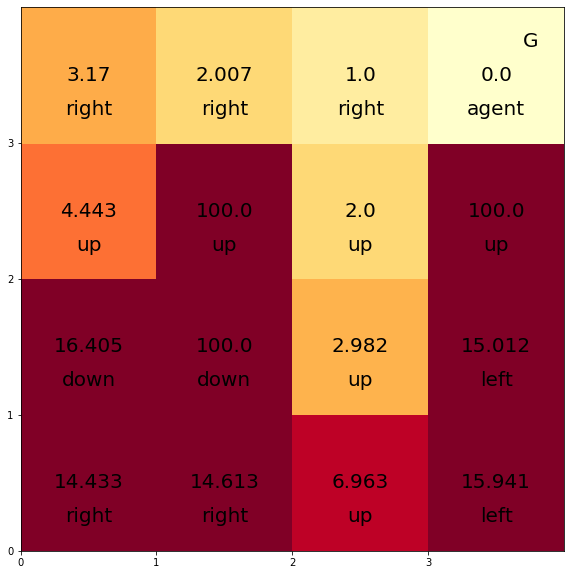

x:0
y:2
x:0
y:0
x:-1
y:1
s:(0, 1)　a:left s':(0, 1) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 1)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:down s':(0, 0) a':right
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':left
----


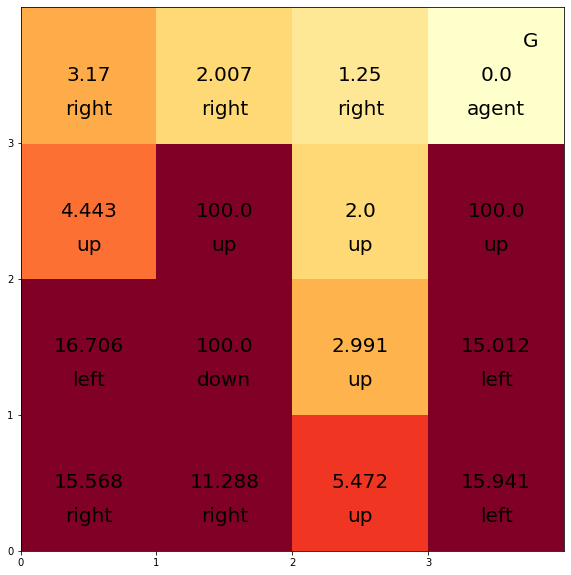

x:0
y:2
x:0
y:0
x:-1
y:1
s:(0, 1)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':right
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


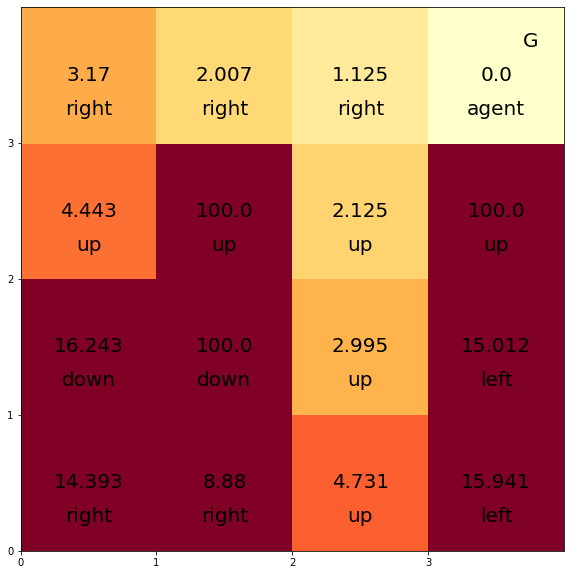

x:3
y:3
x:3
y:1
x:2
y:2
x:4
y:2
x:3
y:4
x:2
y:3
x:4
y:3
s:(3, 2)　a:up s':(3, 3) a':up
----


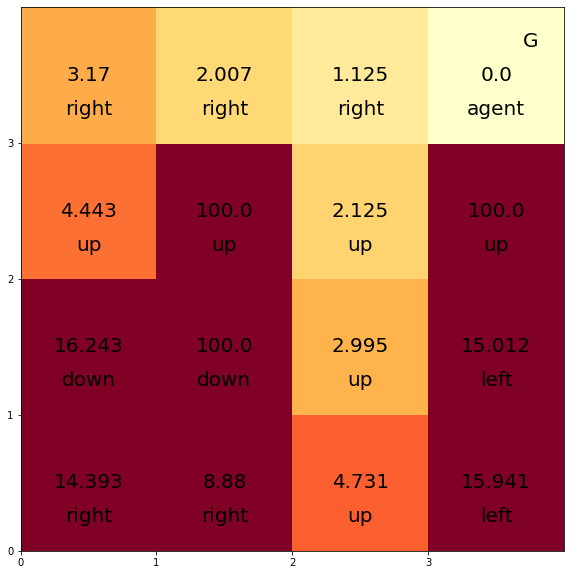

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 3)　a:right s':(2, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


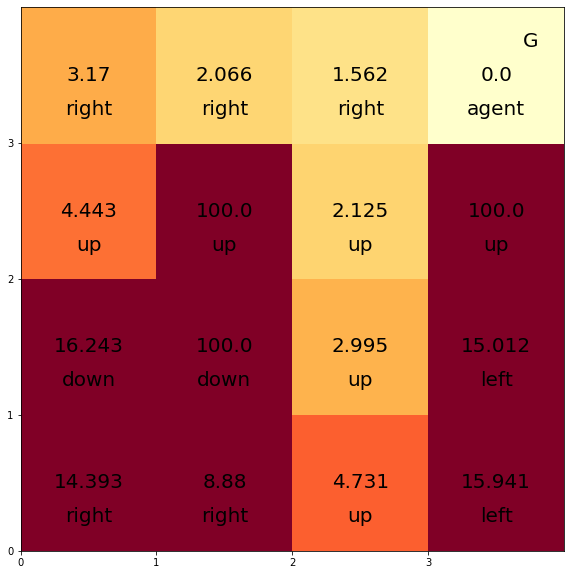

x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':down
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(2, 1)　a:down s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


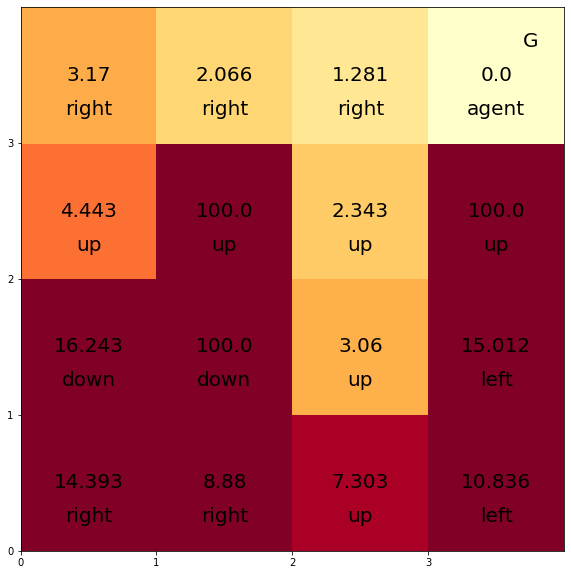

x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


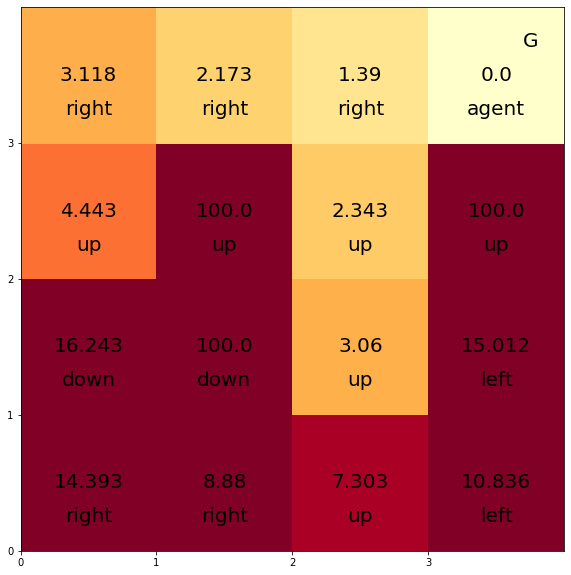

x:3
y:4
x:2
y:3
x:4
y:3


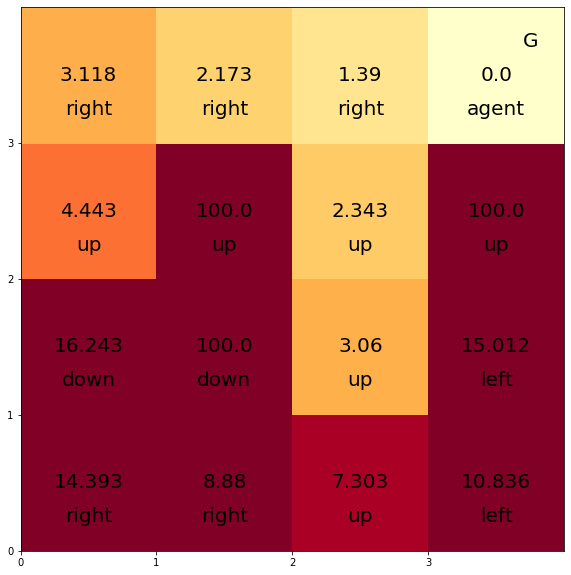

x:0
y:3
x:0
y:1
x:-1
y:2
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 2)　a:up s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


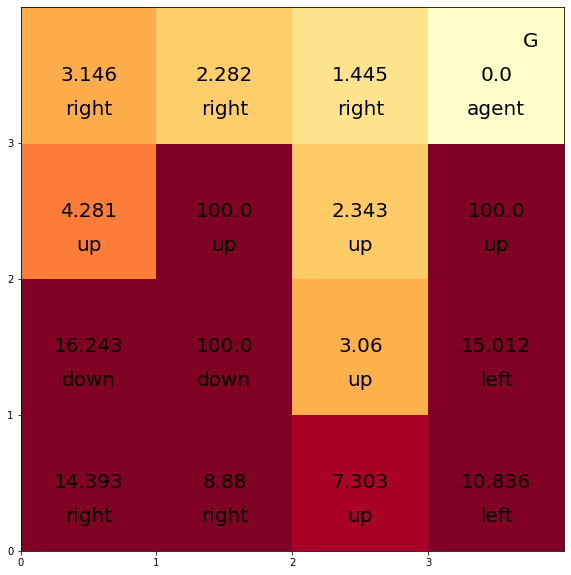

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:3
x:0
y:2
x:2
y:2
s:(1, 2)　a:up s':(1, 2) a':up
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


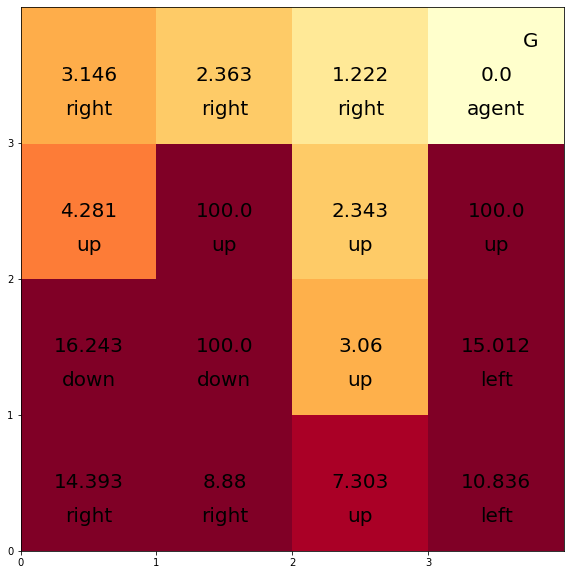

x:1
y:4
x:0
y:3
x:2
y:3
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


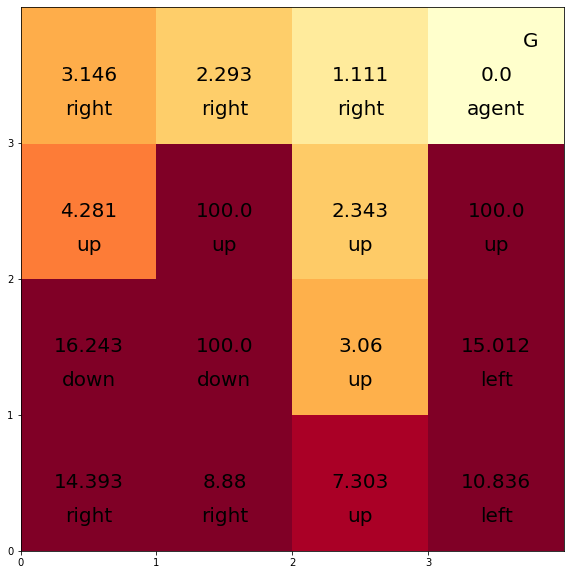

x:0
y:3
x:0
y:1
x:-1
y:2
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 2)　a:up s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


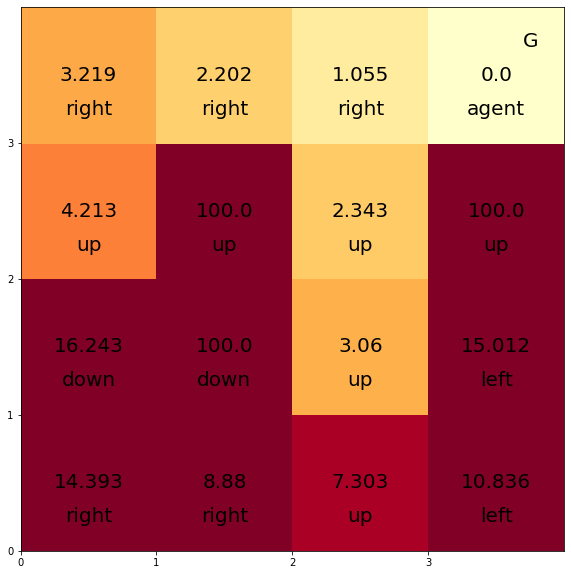

x:3
y:0
x:2
y:1
x:4
y:1
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 1)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(3, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:right s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(2, 0)　a:up s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


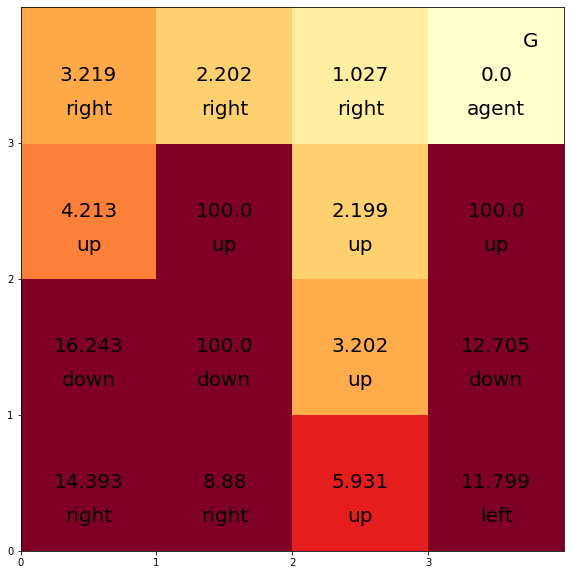

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


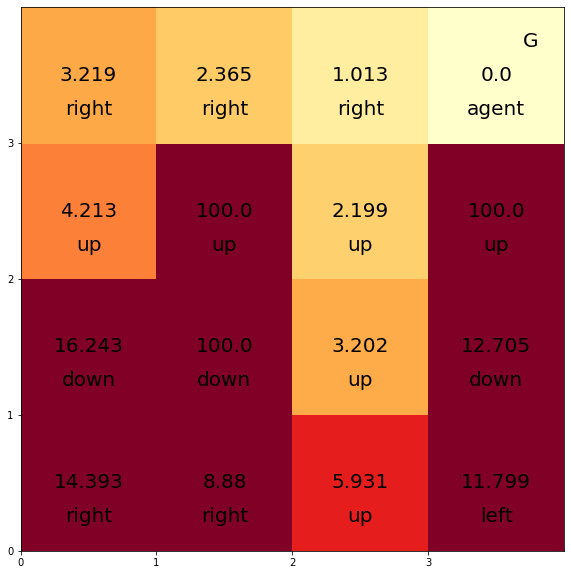

x:3
y:0
x:2
y:1
x:4
y:1
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 1)　a:down s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 1)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


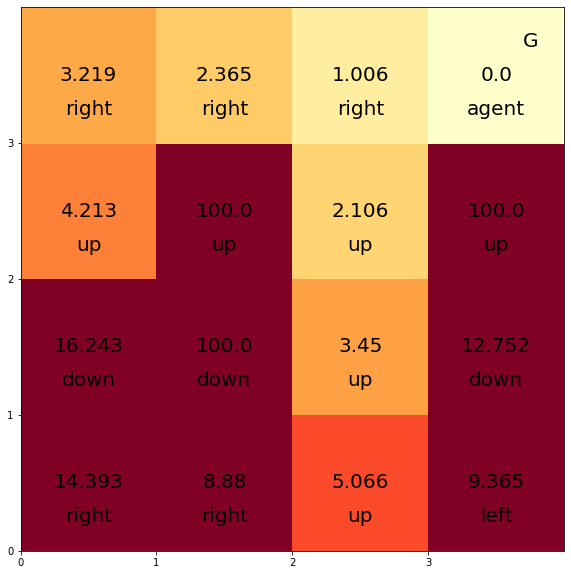

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


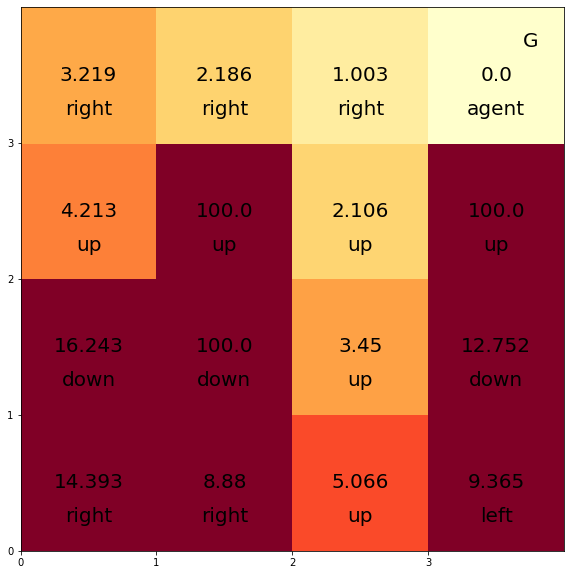

x:1
y:0
x:0
y:1
x:2
y:1
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 1)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


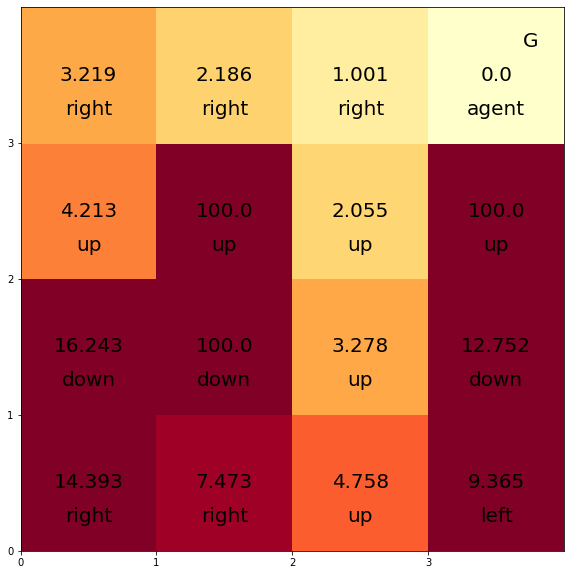

x:2
y:3
x:2
y:1
s:(2, 2)　a:up s':(2, 3) a':left
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(2, 3)　a:left s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':left
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(2, 3)　a:left s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


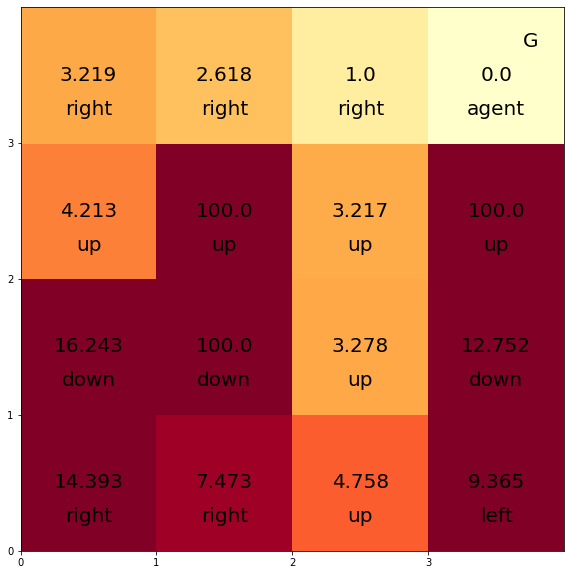

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


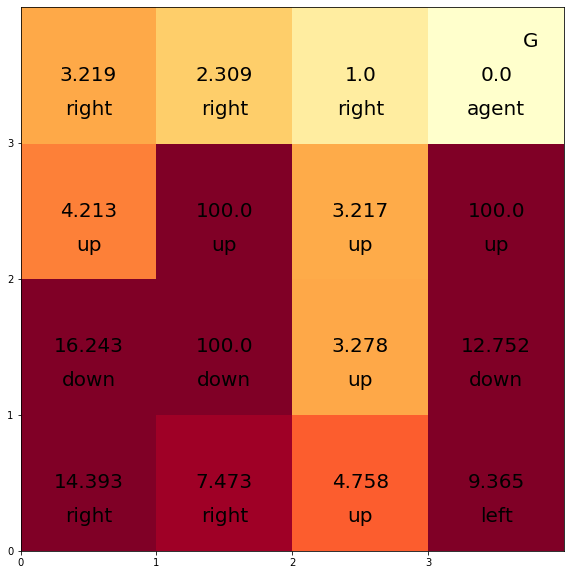

x:1
y:0
x:0
y:1
x:2
y:1
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 1)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(2, 0)　a:up s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


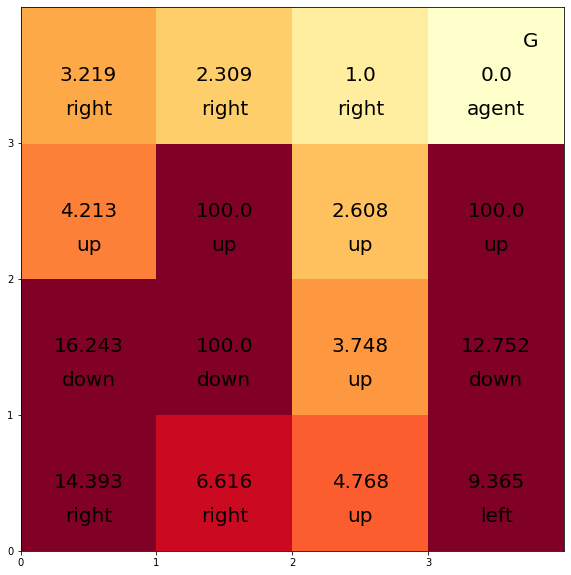

x:3
y:4
x:2
y:3
x:4
y:3
s:(3, 2)　a:up s':(3, 3) a':up
----


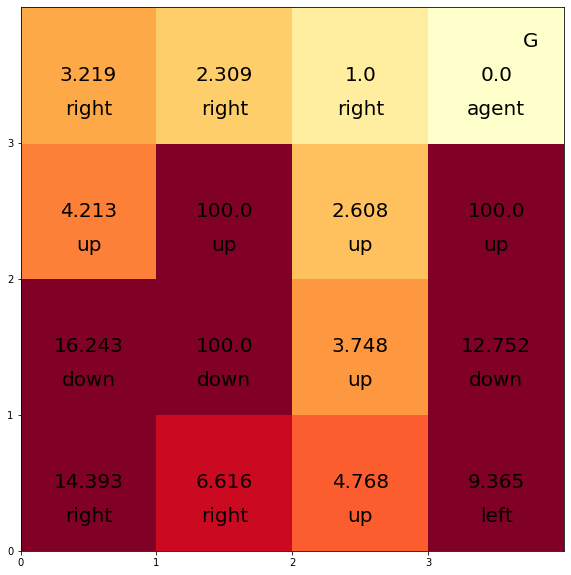

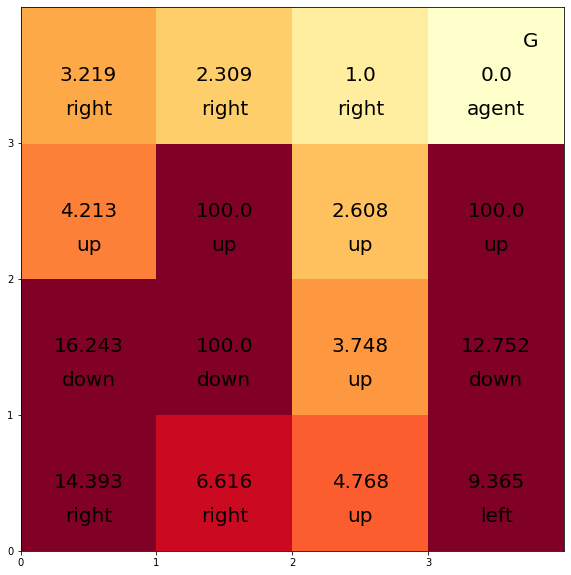

x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


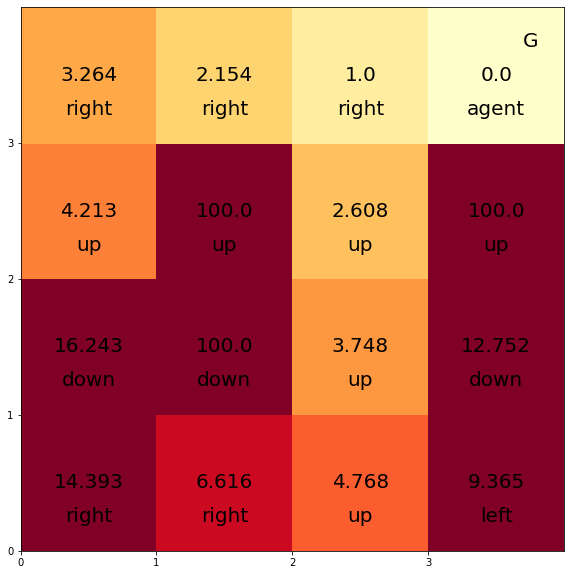

x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


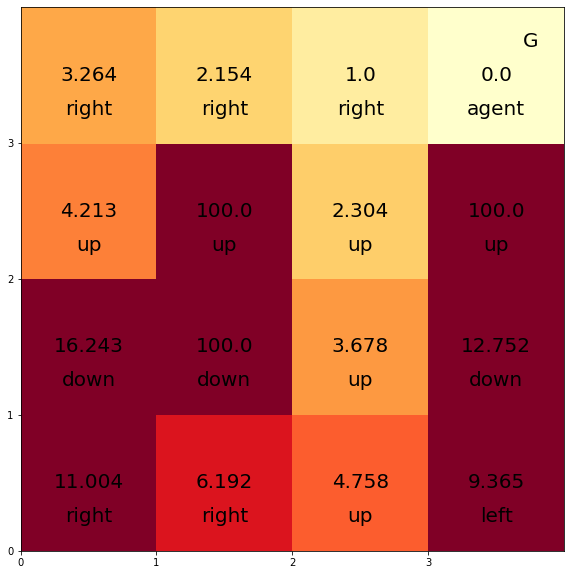

x:1
y:4
x:0
y:3
x:2
y:3
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


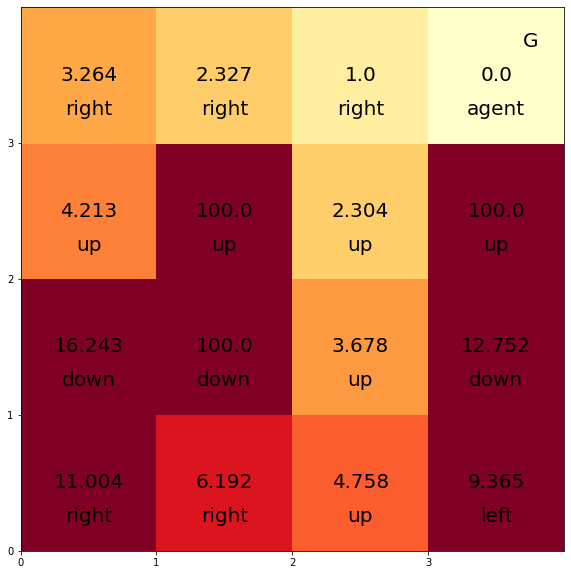

x:1
y:0
x:0
y:1
x:2
y:1
s:(2, 1)　a:left s':(1, 1) a':down
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 1)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


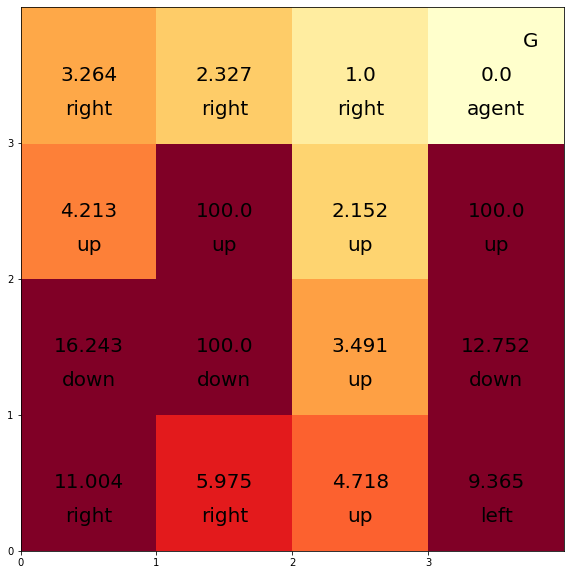

x:0
y:3
x:0
y:1
x:-1
y:2
s:(0, 2)　a:up s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':left
----


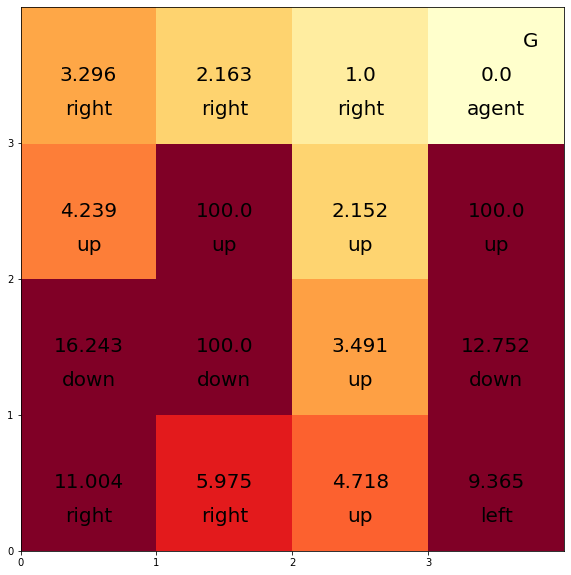

x:0
y:3
x:0
y:1
x:-1
y:2
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 2)　a:up s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


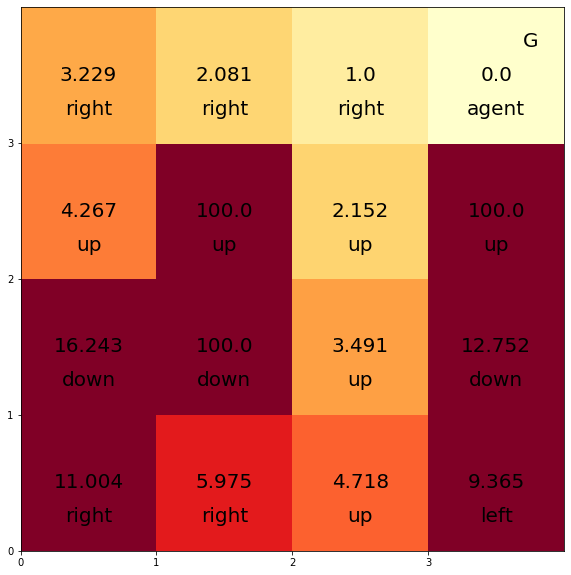

x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 0)　a:right s':(0, 0) a':up
----
x:0
y:2
x:0
y:0
x:-1
y:1
s:(0, 0)　a:up s':(0, 1) a':down
----
x:0
y:1
x:0
y:-1
x:-1
y:0
x:1
y:0
s:(0, 1)　a:down s':(0, 0) a':right
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(0, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


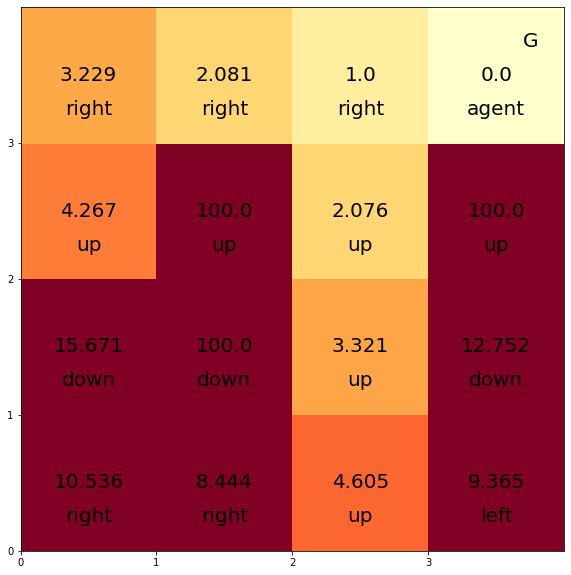

x:1
y:0
x:0
y:1
x:2
y:1
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 1)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


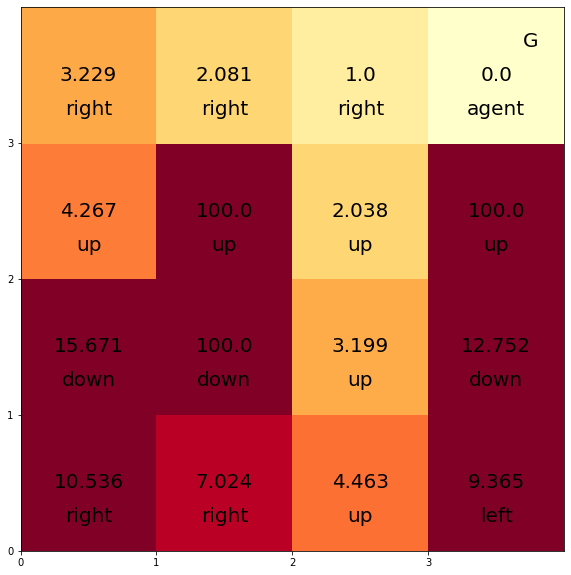

x:0
y:3
x:0
y:1
x:-1
y:2
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 2)　a:up s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


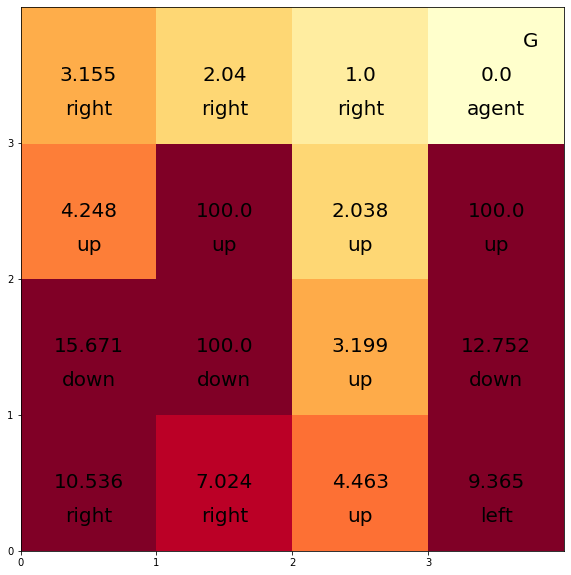

x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


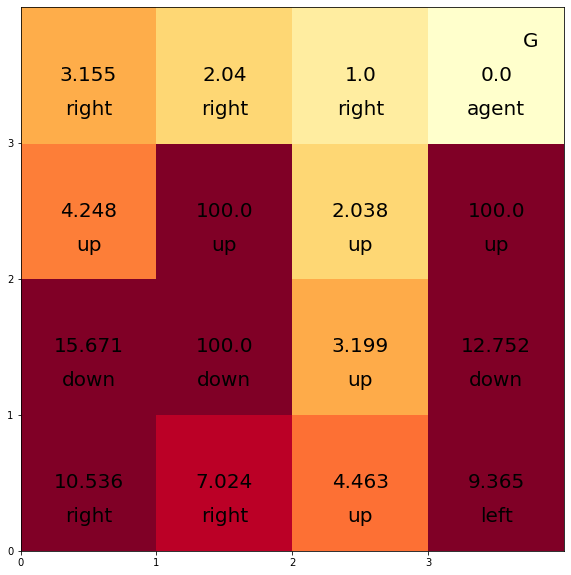

x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 3)　a:right s':(3, 3) a':right
----


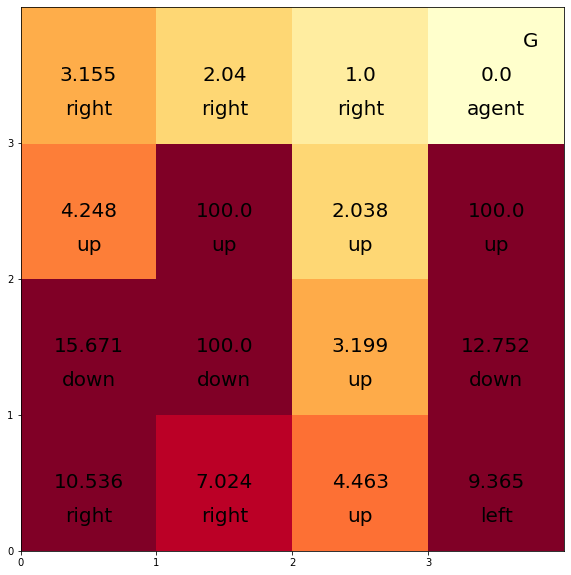

x:3
y:0
x:2
y:1
x:4
y:1
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 1)　a:down s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


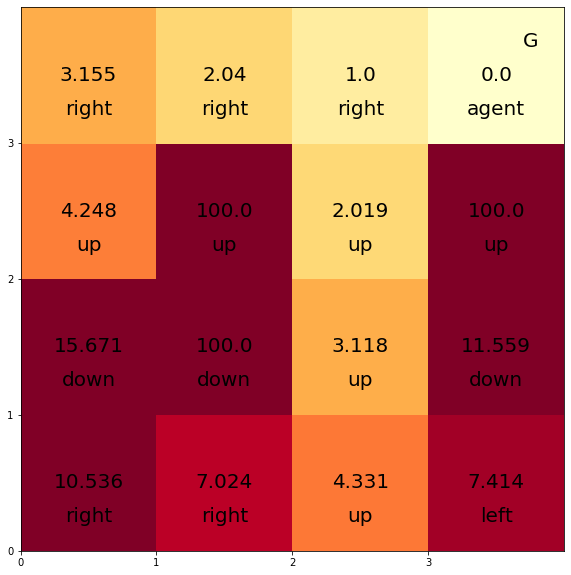

x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


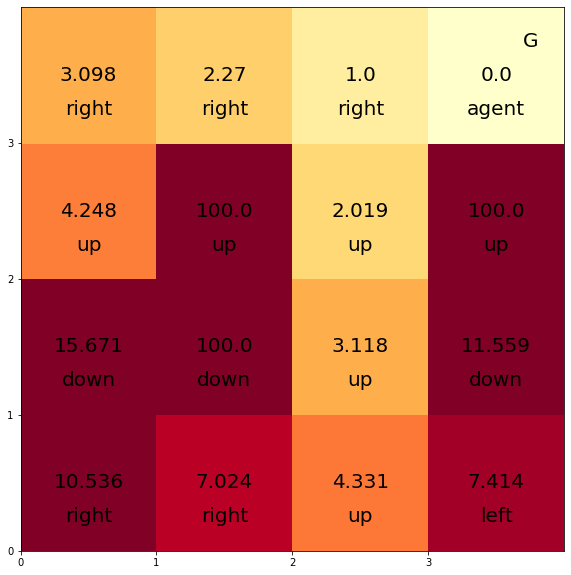

x:1
y:4
x:0
y:3
x:2
y:3
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':right
----


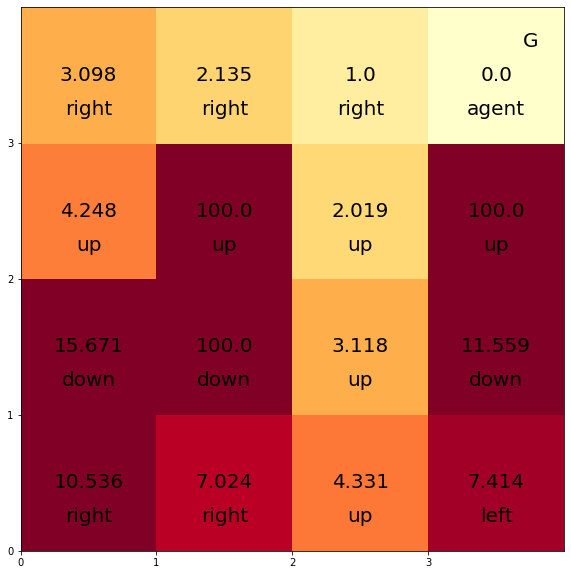

x:0
y:3
x:0
y:1
x:-1
y:2
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 2)　a:up s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


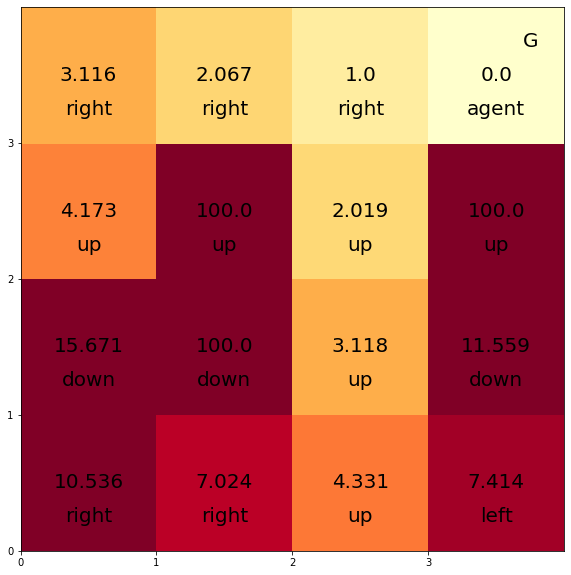

x:1
y:0
x:0
y:1
x:2
y:1
x:1
y:0
x:0
y:1
x:2
y:1
s:(1, 1)　a:down s':(1, 1) a':down
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 1)　a:down s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(2, 0)　a:up s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


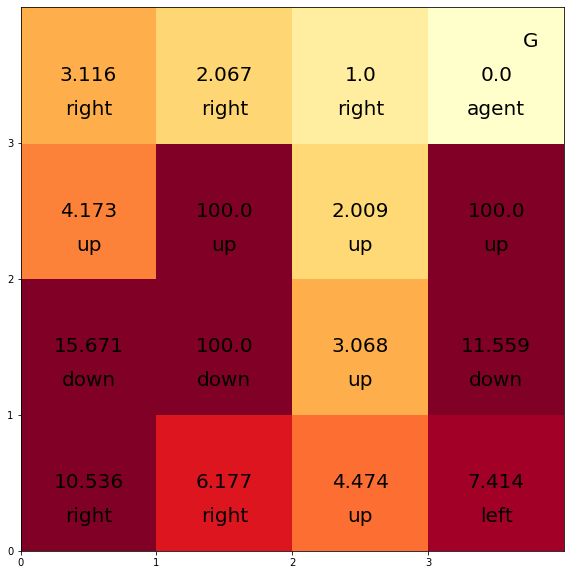

x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 0)　a:up s':(3, 1) a':down
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 1)　a:down s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 1)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


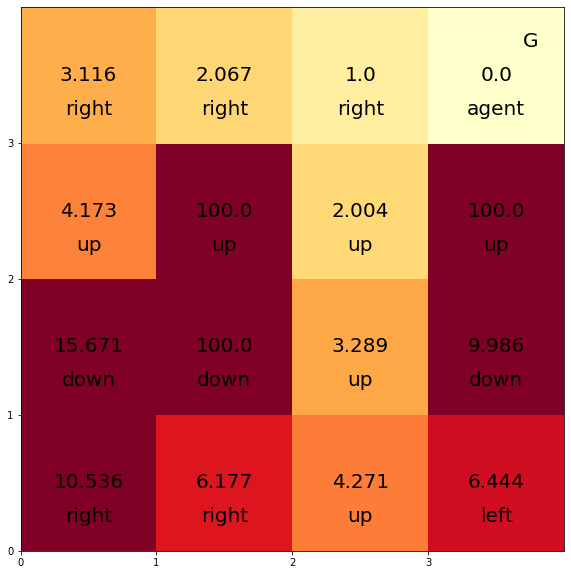

x:0
y:3
x:0
y:1
x:-1
y:2
x:0
y:4
x:0
y:2
x:-1
y:3
x:1
y:3
s:(0, 2)　a:up s':(0, 3) a':right
----
x:1
y:4
x:0
y:3
x:2
y:3
s:(0, 3)　a:right s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


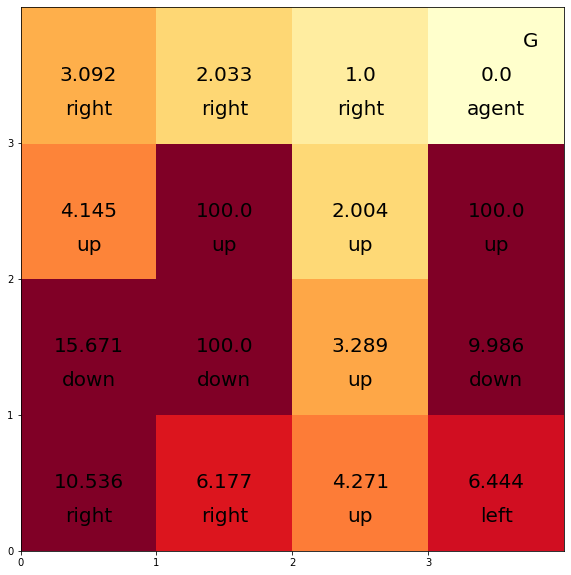

x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


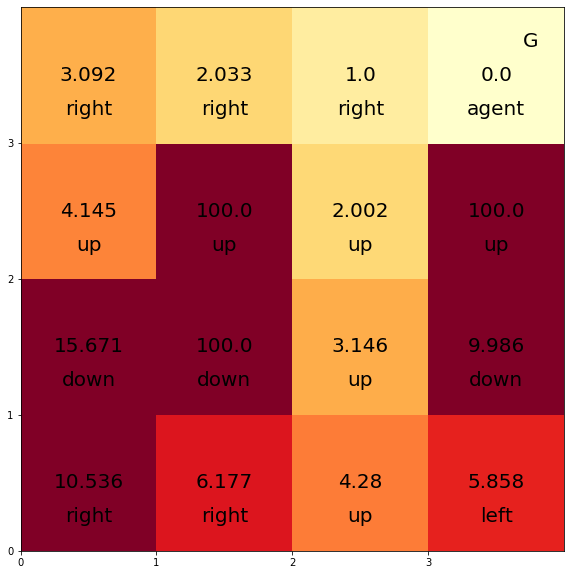

x:1
y:0
x:0
y:1
x:2
y:1
s:(1, 2)　a:down s':(1, 1) a':down
----
x:1
y:-1
x:0
y:0
x:2
y:0
s:(1, 1)　a:down s':(1, 0) a':right
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(1, 0)　a:right s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


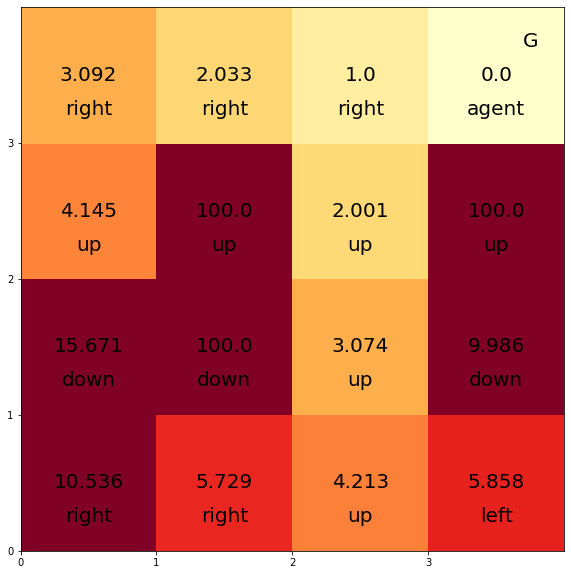

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


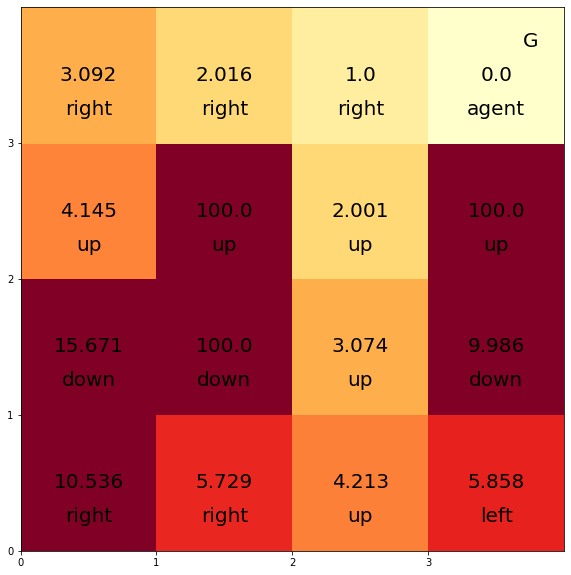

x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


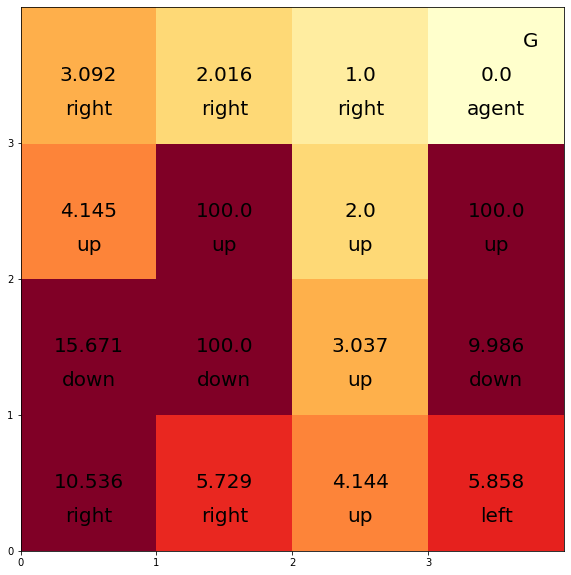

x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


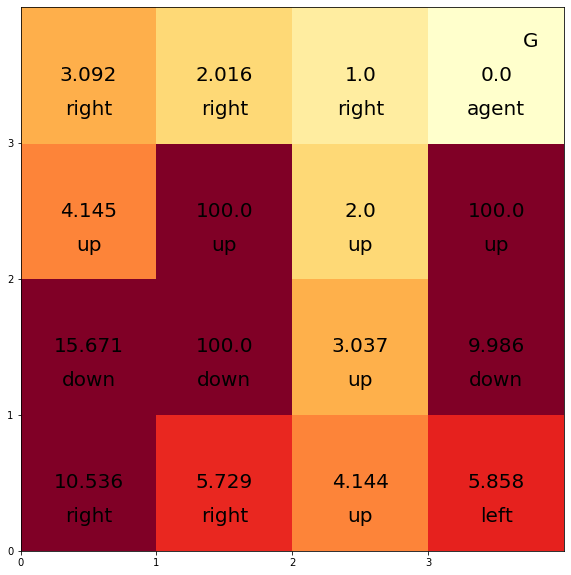

x:3
y:0
x:2
y:1
x:4
y:1
s:(3, 1)　a:down s':(3, 0) a':right
----
x:3
y:1
x:3
y:-1
x:2
y:0
x:4
y:0
s:(3, 0)　a:right s':(3, 0) a':left
----
x:2
y:1
x:2
y:-1
x:1
y:0
x:3
y:0
s:(3, 0)　a:left s':(2, 0) a':up
----
x:2
y:2
x:2
y:0
x:3
y:1
s:(2, 0)　a:up s':(2, 1) a':up
----
x:2
y:3
x:2
y:1
s:(2, 1)　a:up s':(2, 2) a':up
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(2, 2)　a:up s':(2, 3) a':right
----
x:3
y:4
x:2
y:3
x:4
y:3
s:(2, 3)　a:right s':(3, 3) a':up
----


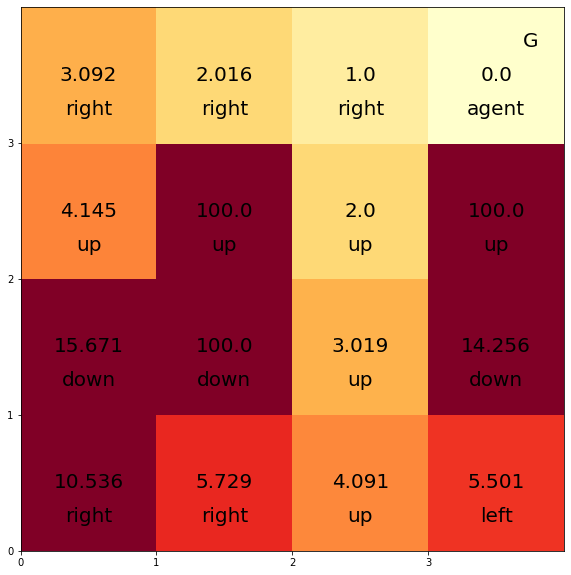

x:1
y:3
x:0
y:2
x:2
y:2
x:1
y:4
x:0
y:3
x:2
y:3
s:(1, 2)　a:up s':(1, 3) a':right
----
x:2
y:4
x:2
y:2
x:1
y:3
x:3
y:3
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':up
----


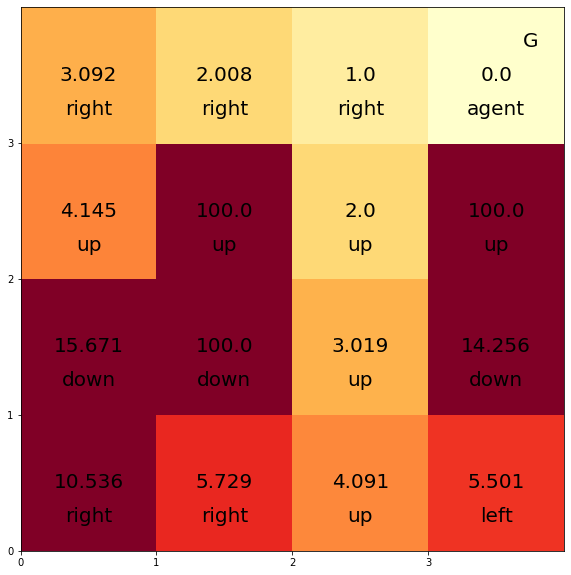

In [8]:
#1ステップの処理
alpha = 0.5
gamma = 1.0

def sarsa(s_position,a):
    s = states[s_position[0]][s_position[1]]
    s_next_position = state_transition(s_position,a)
    s_next = states[s_next_position[0]][s_next_position[1]]
    a_next = e_greedy(s_next, s_next_position[0], s_next_position[1])
    
    q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[a_next])
    print("s:" + str(s_position)+ "　a:" + a + " s':" + str(s_next_position) + " a':" + a_next)
    print("----")
    return s_next_position, a_next, q

def one_trial():
    agent.position = (random.randrange(size),random.randrange(size))
    a = e_greedy(states[agent.position[0]][agent.position[1]], agent.position[0], agent.position[1])
    if states[agent.position[0]][agent.position[1]].goal:
        return
          
    while True:
        #draw(None)
        s_next, a_next, q = sarsa(agent.position,a)
        # 不可侵領域判定
        ok_flag = True
        for not_x, not_y in not_area:
            if agent.position[0] is not_x and agent.position[1] is not_y:
                ok_flag = False
        if ok_flag is True:
            states[agent.position[0]][agent.position[1]].Q[a] = q
        agent.position = s_next
        a = a_next
        if states[agent.position[0]][agent.position[1]].goal:
            break
            
            
for i in range(100):
    one_trial()
    draw("all")